**E-COMMERCE WEB TRAFFIC ANALYSIS - KEY INSIGHTS & HIGHLIGHTS**
-

<div style="background-color:#f0f8ff; padding:10px; border-radius:8px;">
<h3>Background & Data Description</h3>

The purpose of this analysis is to evaluate the performance of different web traffic channels, devices, and  platforms  for  e-commerce business by understanding user engagement, conversion metric, and to identify areas for marketing.This analysis also aim to understand seasonal or time-based performance trends to derive meaningful insights.<br>

The dataset used for this analysis represents simulated e-commerce web traffic and customer behavior across multiple marketing channels, devices, and platforms. It captures user engagement, conversion activity, and channel  performance over time to evaluate  how  different sources contribute to the overall sales funnel.<br>

The data spans the period January 2024 to October 2025 and includes 13 key variables that collectively describe user interactions — from impressions to final purchases. Each record represents aggregated session-level activity. Data contains 12k rows and 13 columns.
</div>

| **Column Name**      |                  **Description**                                       |
| -------------------- | ---------------------------------------------------------------------- |
| `date`               | Session date between Jan 2024 – Oct 2025                               |
| `country`            | User’s country (e.g., United Kingdom, Germany, France, etc.)           |
| `traffic_channel`    | Source of web traffic (Organic, Paid, Social, Referral, Direct, CRM)   |
| `device_type`        | Device used to access the website (Desktop, Mobile, Mobile Web, Tablet)|
| `platform`           | Operating system (iOS, Android, Others)                                |
| `visits`             | Number of visits or sessions generated                                 |
| `session_duration`   | Average time spent per session (in minutes)                            |           
| `no_of_customers`    | Count of customers involved in the session(s)                          |
| `impressions`        | Number of ad or content impressions generated                          |
| `views`              | Number of page or product views resulting from impressions             |
| `wishlist_adds`      | Number of items added to wishlist                                      |
| `cart_adds`          | Number of items added to shopping cart                                 |
| `items_purchased`    | Number of items successfully purchased                                 |
</div>

In [2294]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os, sys, warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
plt.rc('figure', figsize=(10, 6))

In [2295]:
# -----------------------------
# Read Dataset from csv file 
# -----------------------------

df=pd.read_csv('ecommerce_web_traffic_dataset.csv')

In [2296]:
df.head()

,date,country,traffic_channel,device_type,platform,visits,session_duration,no_of_customers,impressions,views,wishlist_adds,cart_adds,items_purchased
0,2024-01-26,Ireland,Paid,Tablet,Android,4,3.45,1,7768,743,8,26,7
1,2024-09-07,Ireland,Organic,Desktop,Android,3,5.17,2,11615,1910,25,178,35
2,2024-04-14,Germany,Direct,Desktop,Android,7,5.21,2,9680,2189,52,213,77
3,2025-07-12,Ireland,Organic,Desktop,iOS,7,3.27,6,10914,2218,39,210,54
4,2025-03-08,United Kingdom,Organic,Mobile,iOS,3,4.14,3,3628,675,17,59,19


In [2297]:
df.isnull().sum() #Check for any null value

date                0
country             0
traffic_channel     0
device_type         0
platform            0
visits              0
session_duration    0
no_of_customers     0
impressions         0
views               0
wishlist_adds       0
cart_adds           0
items_purchased     0
dtype: int64

In [2298]:
df.info()  #info on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              12000 non-null  object 
 1   country           12000 non-null  object 
 2   traffic_channel   12000 non-null  object 
 3   device_type       12000 non-null  object 
 4   platform          12000 non-null  object 
 5   visits            12000 non-null  int64  
 6   session_duration  12000 non-null  float64
 7   no_of_customers   12000 non-null  int64  
 8   impressions       12000 non-null  int64  
 9   views             12000 non-null  int64  
 10  wishlist_adds     12000 non-null  int64  
 11  cart_adds         12000 non-null  int64  
 12  items_purchased   12000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.2+ MB


In [2299]:
# Convert 'date' column data type to datetime

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [2300]:
# Drop any rows where date couldn't be parsed

df = df.dropna(subset=['date'])

In [2301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              12000 non-null  datetime64[ns]
 1   country           12000 non-null  object        
 2   traffic_channel   12000 non-null  object        
 3   device_type       12000 non-null  object        
 4   platform          12000 non-null  object        
 5   visits            12000 non-null  int64         
 6   session_duration  12000 non-null  float64       
 7   no_of_customers   12000 non-null  int64         
 8   impressions       12000 non-null  int64         
 9   views             12000 non-null  int64         
 10  wishlist_adds     12000 non-null  int64         
 11  cart_adds         12000 non-null  int64         
 12  items_purchased   12000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 1.2+ MB


In [2302]:
df.duplicated().sum() #check for any duplicate row

0

In [2303]:
# Check for negative numeric values in all columns

(df.select_dtypes(include=[np.number]) < 0).any()

visits              False
session_duration    False
no_of_customers     False
impressions         False
views               False
wishlist_adds       False
cart_adds           False
items_purchased     False
dtype: bool

In [2304]:
# Check if there is any customer count less than no. of visists/session
#(one customer may trigger multiple sessions and this is an aggregated data)

df[df['no_of_customers']>df['visits']].any()

date                False
country             False
traffic_channel     False
device_type         False
platform            False
visits              False
session_duration    False
no_of_customers     False
impressions         False
views               False
wishlist_adds       False
cart_adds           False
items_purchased     False
dtype: bool

In [2305]:
df.shape

(12000, 13)

In [2306]:
df.describe()

,date,visits,session_duration,no_of_customers,impressions,views,wishlist_adds,cart_adds,items_purchased
count,12000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,2024-11-20 20:59:24,5.007167,4.932573,3.004667,5543.434833,747.212917,14.956333,53.341000,12.688250
min,2024-01-01 00:00:00,1.000000,0.500000,1.000000,816.000000,33.000000,0.000000,0.000000,0.000000
25%,2024-06-07 00:00:00,3.000000,3.460000,1.000000,3245.000000,343.000000,6.000000,18.000000,3.000000
50%,2024-11-19 00:00:00,5.000000,4.680000,3.000000,5487.000000,619.000000,12.000000,38.000000,7.000000
75%,2025-05-05 00:00:00,6.000000,6.200000,4.000000,7695.000000,1037.000000,21.000000,74.000000,17.000000
max,2025-10-20 00:00:00,17.000000,14.740000,14.000000,11933.000000,3333.000000,94.000000,436.000000,178.000000
std,NaN,2.217249,2.036791,1.892118,2716.662442,517.643527,12.297535,48.648047,15.754832


In [2307]:
df['device_type'].unique() #verify all unique values in a column

array(['Tablet', 'Desktop', 'Mobile', 'Mobile Web'], dtype=object)

In [2308]:
df['platform'].unique()

array(['Android', 'iOS', 'Others'], dtype=object)

In [2309]:
df['traffic_channel'].unique()

array(['Paid', 'Organic', 'Direct', 'Social', 'CRM', 'Referral'],
      dtype=object)

In [2310]:
df['country'].unique()

array(['Ireland', 'Germany', 'United Kingdom', 'Spain', 'Italy', 'France'],
      dtype=object)

In [2311]:
df['date'].dt.year.unique()

array([2024, 2025], dtype=int32)

In [2312]:
df['date'].dt.month.unique()

array([ 1,  9,  4,  7,  3,  6,  8, 10,  2, 11,  5, 12], dtype=int32)

In [2313]:
df['date'].dt.day.unique()

array([26,  7, 14, 12,  8,  5,  1, 28, 13, 11,  9, 10,  3, 21, 15,  2, 30,
       16, 29, 25, 24,  6, 20,  4, 22, 17, 23, 18, 19, 27, 31],
      dtype=int32)

In [2314]:
df['date'].dt.day_name().unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [2315]:
#extract different features from 'date' column

df['year'] = df['date'].dt.year #extract 'year' from 'date' column
df['month'] = df['date'].dt.month #extract 'month' from 'date' column
#df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name() #extract 'day' from 'date' column

In [2316]:
df.head()

,date,country,traffic_channel,device_type,platform,visits,session_duration,no_of_customers,impressions,views,wishlist_adds,cart_adds,items_purchased,year,month,day_of_week
0,2024-01-26,Ireland,Paid,Tablet,Android,4,3.45,1,7768,743,8,26,7,2024,1,Friday
1,2024-09-07,Ireland,Organic,Desktop,Android,3,5.17,2,11615,1910,25,178,35,2024,9,Saturday
2,2024-04-14,Germany,Direct,Desktop,Android,7,5.21,2,9680,2189,52,213,77,2024,4,Sunday
3,2025-07-12,Ireland,Organic,Desktop,iOS,7,3.27,6,10914,2218,39,210,54,2025,7,Saturday
4,2025-03-08,United Kingdom,Organic,Mobile,iOS,3,4.14,3,3628,675,17,59,19,2025,3,Saturday


<div style="background-color:#f0f8ff; padding:10px; border-radius:8px;">
<b>EXPLORATORY DATA ANALYSIS</b>

<div style="background-color:#fdecef; padding:10px; border-radius:8px;">
<b>TRAFFIC CHANNEL ANALYSIS</b>


In [2319]:
# ---------------------------------------------------------------------------------------
# Count of Visits/Sessions and Avg Session Duration by traffic_channel
# ---------------------------------------------------------------------------------------

traffic_summary = df.groupby('traffic_channel').agg(
    total_visits=('visits', 'sum'),
    total_session_duration=('session_duration','sum')
).reset_index()
print(traffic_summary.to_markdown(index=False, numalign="left"))

| traffic_channel   | total_visits   | total_session_duration   |
|:------------------|:---------------|:-------------------------|
| CRM               | 3068           | 2901.53                  |
| Direct            | 6310           | 8601.32                  |
| Organic           | 20595          | 23838.3                  |
| Paid              | 15029          | 13119.4                  |
| Referral          | 5978           | 4599.8                   |
| Social            | 9106           | 6130.46                  |


In [2320]:
# --------------------------------------------------------
# Calculate avg daily active customers by traffic channel
# --------------------------------------------------------

# ---- Aggregate Total Customers per Month & Channel ----
monthly_channel_customers = (
    df.groupby(["year", "month", "traffic_channel"])["no_of_customers"]
    .sum()
    .reset_index()
)
# ---- Calculate Days in Each Month ----
monthly_channel_customers["days_in_month"] = (
    pd.PeriodIndex(
        pd.to_datetime(
            monthly_channel_customers["year"].astype(str) + "-" + monthly_channel_customers["month"].astype(str)
        ),
        freq="M"
    ).days_in_month
)
# ---- Calculate Avg Daily Active Customers ----
monthly_channel_customers["avg_daily_active_customers"] = (
    monthly_channel_customers["no_of_customers"] / monthly_channel_customers["days_in_month"]
).round(2)
# ---- Aggregate by Traffic Channel Across Months ----
channel_summary = (
    monthly_channel_customers.groupby("traffic_channel")["avg_daily_active_customers"]
    .mean()
    .reset_index()
    .sort_values("avg_daily_active_customers", ascending=False)
)
channel_summary["avg_daily_active_customers"] = (channel_summary["avg_daily_active_customers"].round().astype(int))
channel_summary

,traffic_channel,avg_daily_active_customers
2,Organic,19
3,Paid,13
5,Social,8
1,Direct,6
4,Referral,5
0,CRM,3


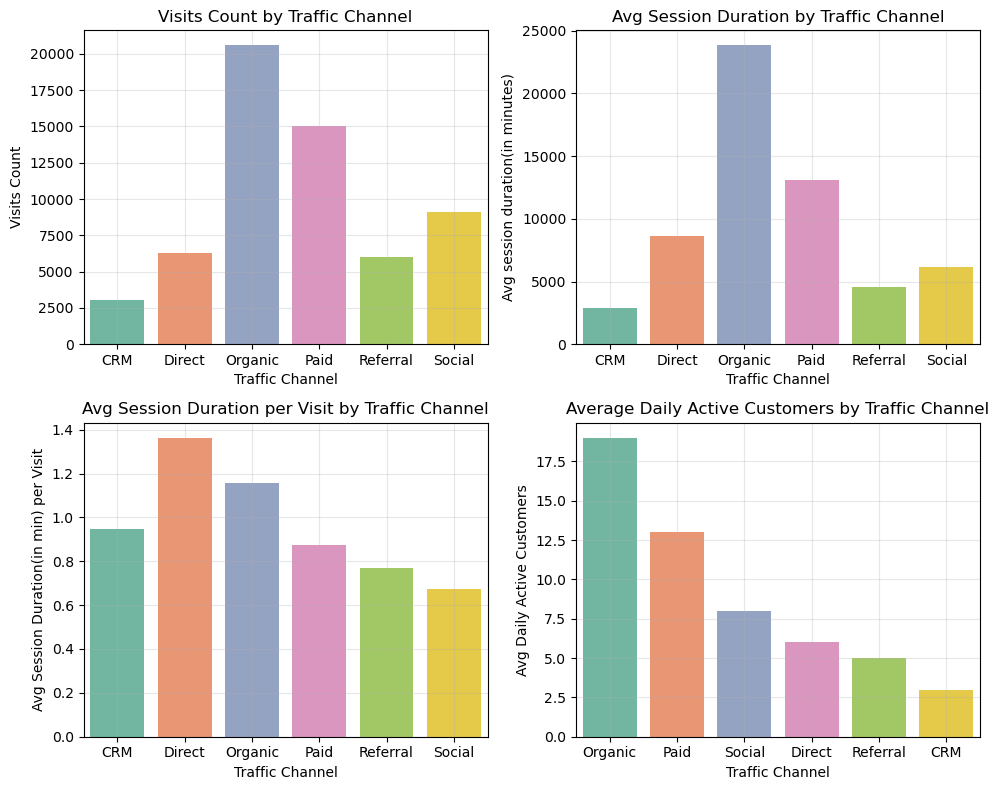

In [2321]:
# -----------------------------------------------------------------------------------------------------------------
# Barplot for visits/session,session duration , Session Duration per visits & avg customer count by Traffic Channel -YTD
# -----------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(10,8))

# Count of visits by traffic channel
plt.subplot(2,2,1)
sns.barplot(data=traffic_summary,x='traffic_channel',y='total_visits',palette='Set2')
plt.title("Visits Count by Traffic Channel")
plt.xlabel("Traffic Channel")
plt.ylabel("Visits Count")
plt.grid(alpha=0.3)

# Avg session duration by traffic channel
plt.subplot(2,2,2)
sns.barplot(data=traffic_summary,x='traffic_channel',y='total_session_duration',palette='Set2')
plt.title("Avg Session Duration by Traffic Channel")
plt.xlabel("Traffic Channel")
plt.ylabel("Avg session duration(in minutes)")
plt.grid(alpha=0.3)

# Avg session duration by traffic channel
plt.subplot(2,2,3)
traffic_summary['avg_session_duration_per_visit'] = traffic_summary['total_session_duration'] / traffic_summary['total_visits']
sns.barplot(data=traffic_summary,x='traffic_channel',y='avg_session_duration_per_visit',palette='Set2')
plt.title("Avg Session Duration per Visit by Traffic Channel")
plt.xlabel("Traffic Channel")
plt.ylabel("Avg Session Duration(in min) per Visit")
plt.grid(alpha=0.3)

# avg daily active customers by traffic channel
plt.subplot(2,2,4)
sns.barplot(data=channel_summary,x='traffic_channel',y='avg_daily_active_customers',palette='Set2')
plt.title("Average Daily Active Customers by Traffic Channel")
plt.xlabel("Traffic Channel")
plt.ylabel("Avg Daily Active Customers")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li><b>Organic and Paid</b> channels dominate total visits. Organic Channel(20k) leads significantly in deriving the most sessions followed by Paid     Channel(15k), indicating recurring user interest. CRM and Referral are lowest, which is expected since these are usually narrower,           returning-user channels.</li><br>
<li>Organic again leads in total average session duration (23838.3 minutes) — indicating both high volume and moderate engagement.</li><br>
<li>avg_session_duration_per_visit shows engagement depth per session, or how long each visit lasts on average. Direct has fewer visits than     Organic but has higher Average Session Time per Visit — suggesting that direct visitors spend more time per session.</li><br>
<li>Average Daily Active Customers Count is high for <b>Organic and Paid</b> channel and least for CRM.</li><br>
<li><b>NOTE:</b> 'no_of_customers' represent session-level customers per aggregated record. Average Daily Active Customers (ADAC) — shows the        typical number of customers active per day, normalized for month length to enable fair comparison across time and channels. ADAC is          approximate in values not the absolute.</li>
</ul>
</div>

In [2323]:
# ---------------------------------------------------------
# Conversion Funnel: Calculate the % rates for each channel
# ---------------------------------------------------------

# CTR(Clich Through Rate) = views / impressions
# Add to cart rate = cart_adds / views
# Conversion rate(Purchase Conversion Rate) = items_purchased / views

funnel_by_channel=df.groupby('traffic_channel')[['impressions', 'views', 'cart_adds', 'items_purchased']].sum().reset_index()

# Calculate CTR
funnel_by_channel['CTR'] = (funnel_by_channel['views'] / funnel_by_channel['impressions'] * 100).round(2)

# Calculate Add-to-Cart Rate
funnel_by_channel['add_to_cart_rate'] = (funnel_by_channel['cart_adds'] / funnel_by_channel['views'] * 100).round(2)

# Calculate Conversion Rate
funnel_by_channel['conversion_rate'] = (funnel_by_channel['items_purchased'] / funnel_by_channel['views'] * 100).round(2)

print(funnel_by_channel.sort_values(by='conversion_rate', ascending=False).to_markdown(index=False, numalign="left"))

| traffic_channel   | impressions   | views   | cart_adds   | items_purchased   | CTR   | add_to_cart_rate   | conversion_rate   |
|:------------------|:--------------|:--------|:------------|:------------------|:------|:-------------------|:------------------|
| CRM               | 3375172       | 788061  | 73530       | 23914             | 23.35 | 9.33               | 3.03              |
| Direct            | 6945399       | 1428664 | 119493      | 33675             | 20.57 | 8.36               | 2.36              |
| Organic           | 23113642      | 3900194 | 290931      | 68454             | 16.87 | 7.46               | 1.76              |
| Referral          | 6631524       | 743652  | 48455       | 9023              | 11.21 | 6.52               | 1.21              |
| Paid              | 16590931      | 1548936 | 86829       | 14807             | 9.34  | 5.61               | 0.96              |
| Social            | 9864550       | 557048  | 20854       | 2386              | 5

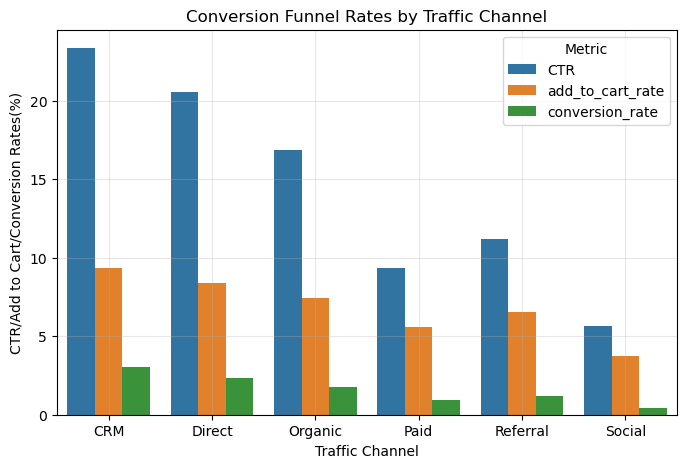

In [2324]:
# -----------------------------------------------------
# Barplot : Conversion Funnel Rates by Traffic Channel
# -----------------------------------------------------
plt.figure(figsize=(8,5))
funnel_by_channel_rate = funnel_by_channel[['traffic_channel','CTR', 'add_to_cart_rate', 'conversion_rate']]
funnel_by_channel_rate = pd.melt(funnel_by_channel_rate, id_vars='traffic_channel', var_name='Metric', value_name='Rate')

sns.barplot(data=funnel_by_channel_rate, x='traffic_channel', y='Rate', hue='Metric')
plt.title("Conversion Funnel Rates by Traffic Channel")
plt.xlabel("Traffic Channel")
plt.ylabel("CTR/Add to Cart/Conversion Rates(%)")
plt.grid(alpha=0.3)
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li><b>CRM,Direct and Organic</b> Channels top in CTR, add_to_cart_rate & conversion_rate, suggesting that visitors from CRM & Direct channels are      much more likely to take buying actions. CRM and Direct consistently deliver quality and conversion. Organic has large volume of             awareness and engagement but lower conversion rate compared to CRM & Direct.</li><br>
<li>Social is having least CTR(5.65%), add_to_cart_rate(3.74%) & conversion_rate(0.43%) which may indicate that Social brings curiosity          clicks but lacks purchase intent.</li><br>
<li>Paid Channel has large volume of views(1548936) and impressions(16590931) compared to CRM, Referral & Direct, but smaller volume of          cart_adds & items_purchased than Direct leading to weak rate metrics and underperform in conversions.</li><br>
<li>Further deep dive analysis in paid and social channel is highly recommended. We need to "segment the analysis” based ontime / device_type    /platform/country to understand why CRM and Direct outperform and why Paid/Social underperform.</li>
</ul>
</div>

In [2326]:
# ------------------------------------------------------------
# Avg items purchased per customer by tarffic channel analysis
# ------------------------------------------------------------
channel_purchase = df.groupby('traffic_channel')['items_purchased'].sum().reset_index()
channel_purchase

,traffic_channel,items_purchased
0,CRM,23914
1,Direct,33675
2,Organic,68454
3,Paid,14807
4,Referral,9023
5,Social,2386


In [2327]:
# Merge channel_purchase & channel_summary by 'traffic_channel'
merged_channel = pd.merge(channel_purchase, channel_summary, on='traffic_channel', how='inner')

# Sort by traffic_channel
merged_channel = merged_channel.sort_values('traffic_channel').reset_index(drop=True)

merged_channel['avg_items_purchased_per_customer']=merged_channel['items_purchased']/merged_channel['avg_daily_active_customers']
merged_channel['avg_items_purchased_per_customer']=merged_channel['avg_items_purchased_per_customer'].round(2)

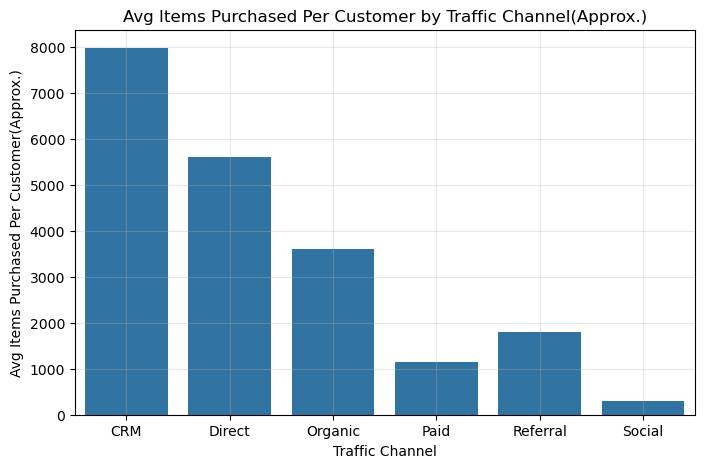

,traffic_channel,items_purchased,avg_daily_active_customers,avg_items_purchased_per_customer
0,CRM,23914,3,7971.33
1,Direct,33675,6,5612.50
2,Organic,68454,19,3602.84
4,Referral,9023,5,1804.60
3,Paid,14807,13,1139.00
5,Social,2386,8,298.25


In [2328]:
# ----------------------------------------------------------
# Barplot - Average Purchase Per Customer by Traffic Channel
# ----------------------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=merged_channel, x='traffic_channel', y='avg_items_purchased_per_customer')
plt.title("Avg Items Purchased Per Customer by Traffic Channel(Approx.)")
plt.xlabel("Traffic Channel")
plt.ylabel("Avg Items Purchased Per Customer(Approx.)")
plt.grid(alpha=0.3)
plt.show()
display(merged_channel.sort_values(by='avg_items_purchased_per_customer',ascending=False))

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li><b>CRM</b> has high avg purchase per customer. Organic have high volume of purchase and customers but lower average purchase per       customer compared to CRM which indicates that CRM generates most valuable, committed customers, while Direct/Organic are focused on bringing in sheer volume. The focus should be on building a better bridge between the two segments. Direct has next highest avg purchase per customer. Referral has small volume compared to Paid but better avg purchase per customer.</li><br>
<li>Paid and Social having least avg_purchase_per_customer. Optimization required in Organic,Referral,Paid & Social Channels to increase average purchase per customer.</li><br>
<b>NOTE: </b><br>
<b>Assumptions & Limitations: </b><br>
<ul><li> Average Purchase Per Customer(APPC) only counts volume (number of items per customer), not value (price). Since we lack revenue information in our dataset, hence the biggest restriction is that "High APPC" might not mean "High Revenue".</li><br>

  <li>With our current analysis finding we may recommendation to invest heavily in CRM but that could be flawed if the CRM segment is purchasing low-margin items.</li><br>

   <li>The ultimate purpose of a channel analysis is to determine Return on Investment but due to lack of revenue data there will be an             inability to Calculate True ROI, which is major in deriving an insights and recommendation.</li><br>

 <li>While the lack of revenue data is a major restriction, the insights derived are still valid for behavioral patterns and channel intent.</li><br>

   <li>Since our data is at aggregated level and Average Daily Active Customers (ADAC) — shows the typical number of customers active per day, normalized for month length to enable fair comparison across time and channels, hence the APPC is also an approx calculation.</li>
</ul>
</ul>
</div>

In [2330]:
# ------------------------------------------------
# Cart Abandonment Rate analysis by traffic source
# ------------------------------------------------

# purchase completion rate = items_purchased/cart_adds
# cart abadonment rate = 1 - purchase completion rate

cart_summary = df.groupby('traffic_channel').agg(
    total_cart_adds=('cart_adds', 'sum'),
    total_items_purchased=('items_purchased', 'sum')
).reset_index()
cart_summary['purchase_completion_rate']=(cart_summary['total_items_purchased']/cart_summary['total_cart_adds']*100).round(2)
cart_summary['cart_abandonment_rate']=100-cart_summary['purchase_completion_rate']
print(cart_summary.sort_values(by='cart_abandonment_rate').to_markdown(index=False, numalign="left"))

| traffic_channel   | total_cart_adds   | total_items_purchased   | purchase_completion_rate   | cart_abandonment_rate   |
|:------------------|:------------------|:------------------------|:---------------------------|:------------------------|
| CRM               | 73530             | 23914                   | 32.52                      | 67.48                   |
| Direct            | 119493            | 33675                   | 28.18                      | 71.82                   |
| Organic           | 290931            | 68454                   | 23.53                      | 76.47                   |
| Referral          | 48455             | 9023                    | 18.62                      | 81.38                   |
| Paid              | 86829             | 14807                   | 17.05                      | 82.95                   |
| Social            | 20854             | 2386                    | 11.44                      | 88.56                   |


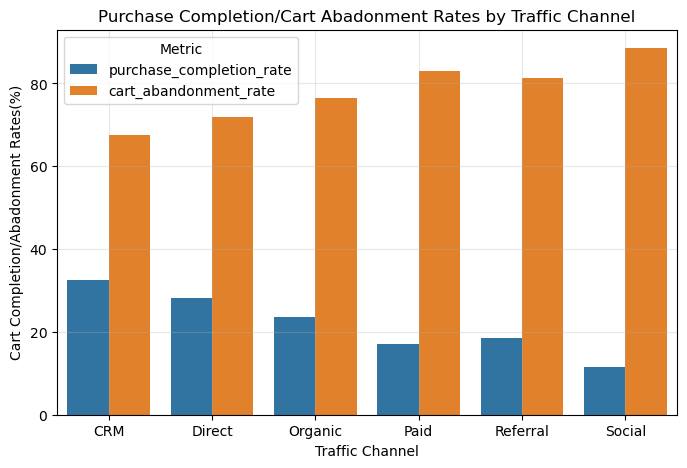

In [2331]:
plt.figure(figsize=(8,5))
cart_summary_rate = cart_summary[['traffic_channel','purchase_completion_rate', 'cart_abandonment_rate']]
cart_summary_rate = pd.melt(cart_summary_rate, id_vars='traffic_channel', var_name='Metric', value_name='Rate')

sns.barplot(data=cart_summary_rate, x='traffic_channel', y='Rate', hue='Metric')
plt.title("Purchase Completion/Cart Abadonment Rates by Traffic Channel")
plt.xlabel("Traffic Channel")
plt.ylabel("Cart Completion/Abadonment Rates(%)")
plt.grid(alpha=0.3)
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li><b>CRM</b> has high purchase completion rate of 32.52% and least cart abandonement rate of 67.48% means CRM driven customers purchase 1 out of every 3 items in cart. Paid and Social have the highest cart abandonment — 82.95% and 88.56% respectively. Social especially stands out as the weakest of all.<br>
 This demonstrates a huge difference in the quality and intent of customers driven by retention channels (CRM) versus mass acquisition        channels(Paid/Social). Every customer who makes it into the CRM program becomes 2-3 times more likely to finish their purchase compared      to someone from Paid or Social.</li><br>
<li>The strategy must be to mitigate the abandonment rate on Paid/Social while continuing to feed users into the highly profitable CRM           segment. Since our dataset lack demographic and historical customer data in detail, the biggest restriction is we are treating every         customer within a segment (Paid, Social, CRM) as homogeneous, when in reality, they are individuals with vastly different value   histories.<br>
   
   We can present further actionable insights by investigating actual long-term value of the customer, differentiating between a "Browsing      Abandoner" and a "Loyalty Abandoner", knowing who the customer is (age, income, location) and analyzing the items customer purchase.</li>
</ul>
</div>


<div style="background-color:#fdecef; padding:10px; border-radius:8px;">
<b>ENGAGEMENT BEHAVIOR ANALYSIS</b>

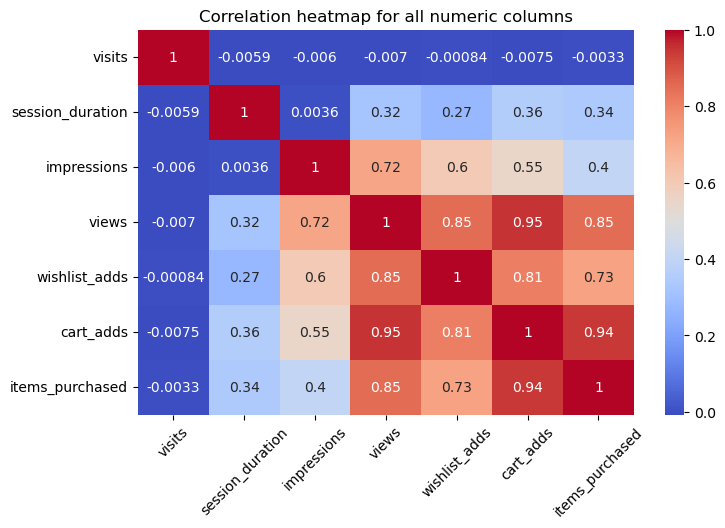

In [2334]:
# --------------------------------------------------------------------------
# Correlation heatmaps to analyze relationships between all numeric columns
# --------------------------------------------------------------------------
plt.figure(figsize=(8,5))
corr=df[['visits','session_duration','impressions','views','wishlist_adds','cart_adds','items_purchased']].corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.title('Correlation heatmap for all numeric columns')
plt.tick_params(axis='x', rotation=45)
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li><b>Low or near-zero correlations with visits</b> suggesting “number of visits” doesn’t directly drive engagement or purchases.</li><br>
<li><b>session_duration moderately correlated with engagement & purchase</b> - views/cart_adds/items_purchased ->0.32–0.36.( For that reason we further need to visualize this with a scatter plot: session_duration vs items_purchased to show this trend).</li><br>
<li>impressions strongly correlated with views(0.72).
   wishlist_adds moderately to strongly linked with cart_adds & purchases (0.81–0.73).
   <b>views, wishlist_adds, cart_adds, and items_purchased are highly correlated</b> indicating healthy conversion funnel but may also suggest suggest redundancy.<br>
   <b>views <-> cart_adds (0.95), cart_adds <-> items_purchased (0.94), views <-> items_purchased (0.85</b>)</li><br>
<li>Focus should be exclusively on the quality and engagement of the traffic (Impressions and Views) that we already have rather than            quantity of of traffic(visits).</li>
</ul>
</div>

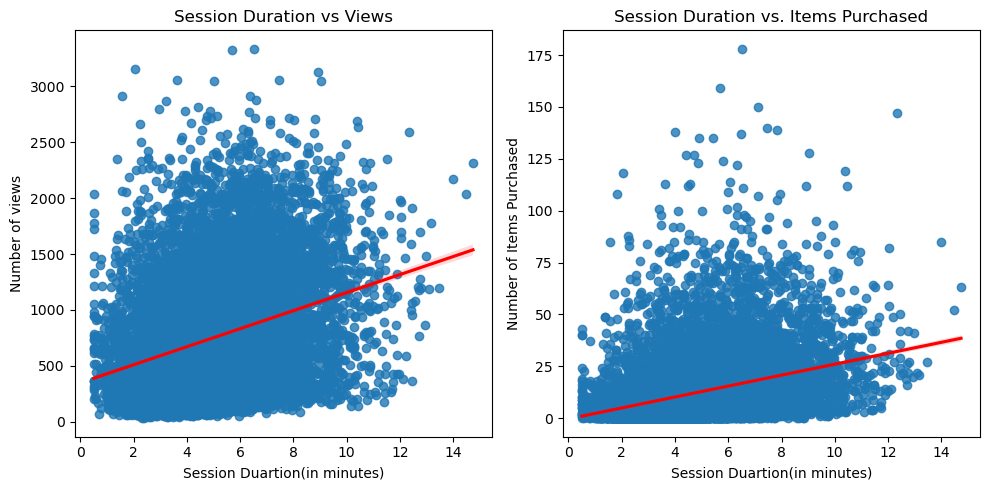

In [2336]:
# ------------------------------------------------
# Relationship between session_duration and views
# ------------------------------------------------

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
#sns.scatterplot(data=df, x='session_duration', y='views')
sns.regplot(
    x='session_duration', 
    y='views', 
    data=df, 
    scatter=True, 
    # Regression line arguments (default is linear)
    line_kws={'color': 'red'}
)
plt.title('Session Duration vs Views')
plt.xlabel('Session Duartion(in minutes)')
plt.ylabel('Number of views')

# -----------------------------------------------------------
# Correlation between session_duration and items_purchased
# -----------------------------------------------------------

plt.subplot(1,2,2)
sns.regplot(
    x='session_duration', 
    y='items_purchased', 
    data=df, 
    scatter=True, 
    # Regression line arguments (default is linear)
    line_kws={'color': 'red'}
)
plt.title('Session Duration vs. Items Purchased')
plt.xlabel('Session Duartion(in minutes)')
plt.ylabel('Number of Items Purchased')

plt.tight_layout()
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<ul>
<li>Session Duration vs Views indicates slightly high engagement. As session duration increases, the number of views also tends to increase             moderately (the red regression line slopes slightly upward).</li>
<br>
<li>Session Duration vs Items Purchased shows that the slope is slightly upward, though less steep and more scattered suggesting longer          sessions slightly increase the likelihood of purchases, but the effect is not as strong as for views. We further analyse Session Duration vs Items Purchased by Traffic Cahnnel and Device Type.</li>
</ul>
</div> 


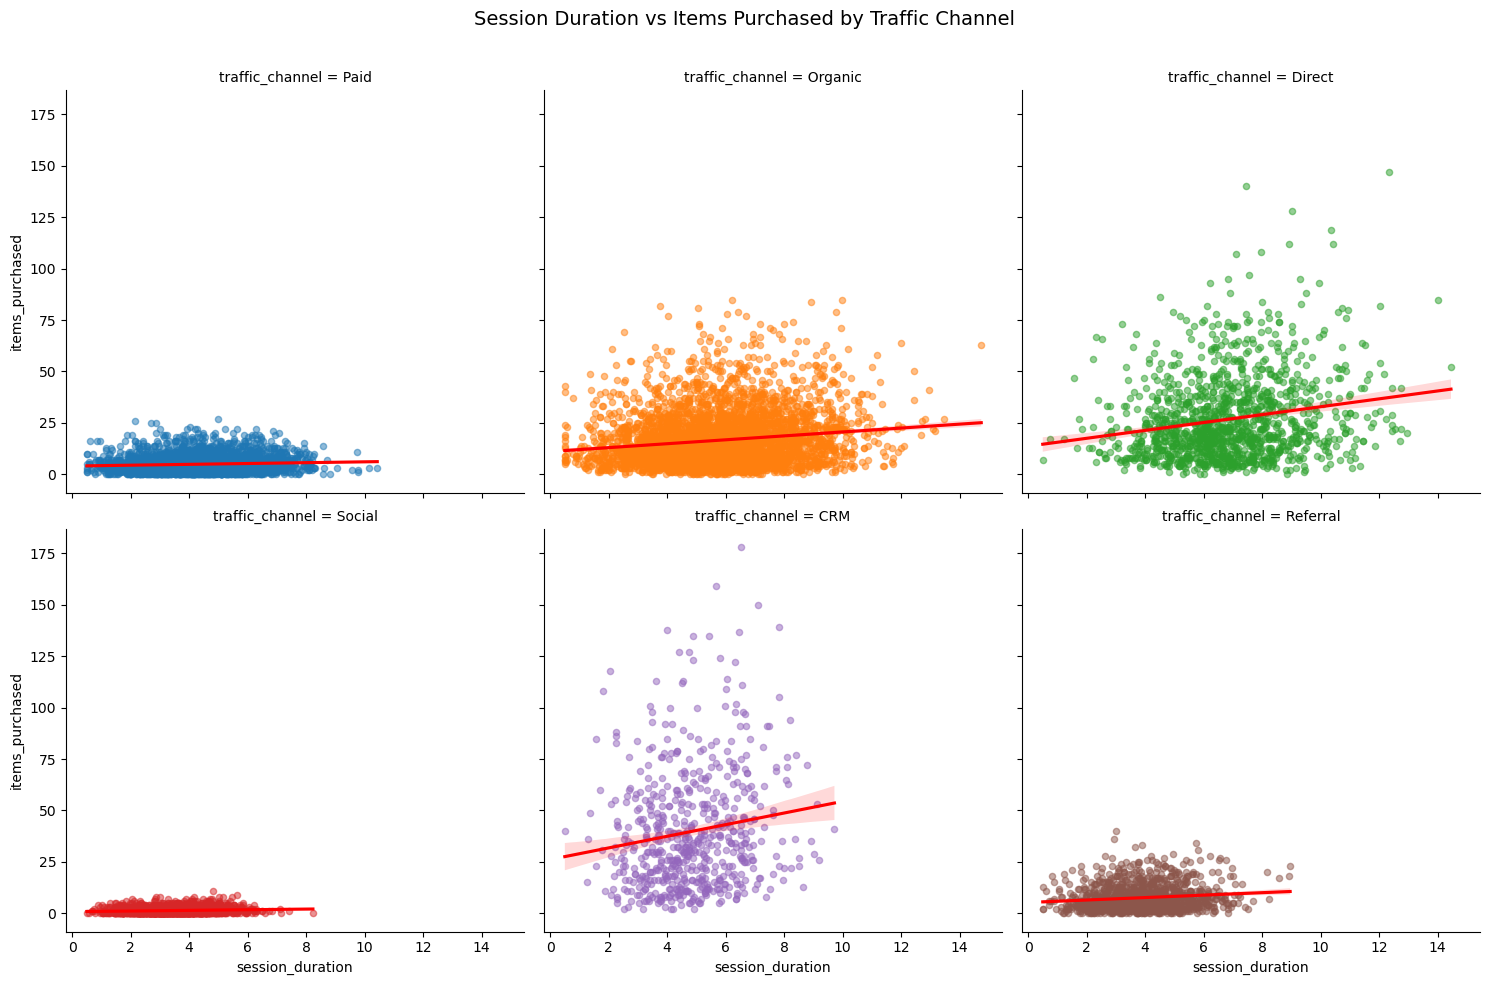

In [2338]:
# -------------------------------------------------------
# Session Duration vs Items Purchased by Traffic Channel
# --------------------------------------------------------

sns.lmplot(
    data=df,
    x='session_duration',
    y='items_purchased',
    hue='traffic_channel',        
    col='traffic_channel',        # create subplots per channel
    col_wrap=3,                   # wrap 3 plots per row
    scatter_kws={'alpha':0.5, 's':20},
    line_kws={'color':'red'}
)

plt.subplots_adjust(top=0.9) #prevent the titles of subplots from being overlapped
plt.suptitle("Session Duration vs Items Purchased by Traffic Channel", fontsize=14)
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<ul>
<li>Session Duration vs Items Purchased for Paid, Social and Referral show that the slope is nearly flat. Slightly upward for organic, Direct    and CRM but less steep.</li><br>
<li>Plot is more scattered for Direct and CRM than others suggesting high variation among users( mix purhase behavior). The high scatter in      CRM/Direct could be a positive sign of a diversified, healthy, and highly valuable customer base. It means these customers use site for      every purpose: quick, transactional reorders and deep, multi-item browsing sessions. This is why their overall average purchase value is     high.</li>
</ul>
</div> 


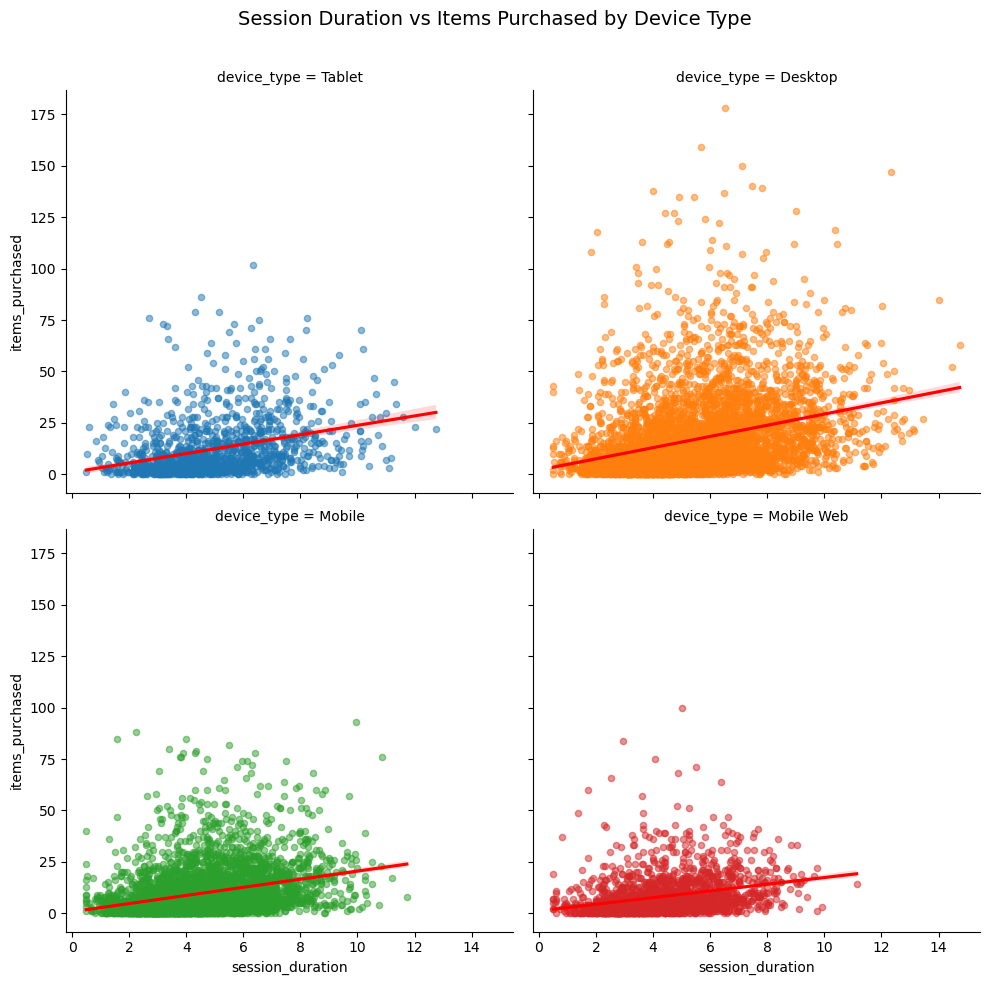

In [2340]:
# -------------------------------------------------------
# Session Duration vs Items Purchased by Device Type
# --------------------------------------------------------
sns.lmplot(
    data=df,
    x='session_duration',
    y='items_purchased',
    hue='device_type',
    col='device_type',
    col_wrap=2, 
    scatter_kws={'alpha':0.5, 's':20},
    line_kws={'color':'red'}
)

plt.subplots_adjust(top=0.9)
plt.suptitle("Session Duration vs Items Purchased by Device Type", fontsize=14)
plt.show()



<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<ul>
<li>Mobile shows flatter and less steep line compared to other 3 device types. Overall all of them show similar behavior except the Desktop      is having more scattered data comparatively.</li>
</ul>
</div>


<div style="background-color:#fdecef; padding:10px; border-radius:8px;">
<b>DEVICE TYPE AND PLATFORM ANALYSIS</b>


Engagement Summary by Device Type & Platform:
   device_type platform  visits  session_duration  no_of_customers
0     Desktop  Android   12067          5.299510             7231
3      Mobile  Android   10616          4.381829             6392
2     Desktop      iOS    9499          5.878130             5796
5      Mobile      iOS    8063          4.844537             4868
6  Mobile Web  Android    4672          4.137335             2783


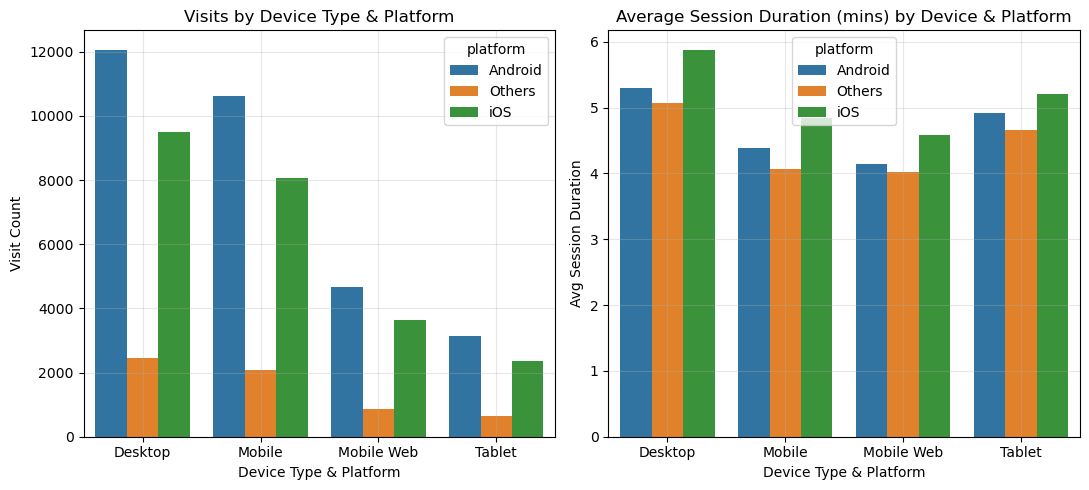

In [2343]:
# ----------------------------------------------
#  Engagement Analysis by Device & Platform
# ----------------------------------------------
plt.figure(figsize=(11,5))

engagement_summary = df.groupby(['device_type', 'platform']).agg({
    'visits': 'sum',
    'session_duration': 'mean',
    'no_of_customers': 'sum'
}).reset_index()

print("Engagement Summary by Device Type & Platform:\n", engagement_summary.sort_values(by='visits', ascending=False).head())

# Bar plot - Visits by Device Type

plt.subplot(1,2,1)
sns.barplot(data=engagement_summary, x='device_type', y='visits', hue='platform')
plt.title("Visits by Device Type & Platform")
plt.xlabel("Device Type & Platform")
plt.ylabel("Visit Count")
plt.grid(alpha=0.3)

# Bar plot - Average Session Duration by Device/Platform

plt.subplot(1,2,2)
sns.barplot(data=engagement_summary, x='device_type', y='session_duration', hue='platform')
plt.title("Average Session Duration (mins) by Device & Platform")
plt.xlabel("Device Type & Platform")
plt.ylabel("Avg Session Duration")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li><b>Desktop/Mobile users</b> - High visits/sessions in Andriod followed by iOS.</li><br>
<li>Lowest visits - seen in Tablet(Others) and Mobile Web(Others).</li><br>
<li>Avg session duration - <b>High in Desktop</b> across all platforms followed by Tablet(iOS)</li>
</ul>
</div>


In [2345]:
# --------------------------------------------------------
# Calculate avg daily active customers by traffic channel
# --------------------------------------------------------

# ---- Aggregate Total Customers per Month & Channel ----
device_monthly_customers = (
    df.groupby(["year", "month", "device_type","platform"])["no_of_customers"]
    .sum()
    .reset_index()
)
# ---- Calculate Days in Each Month ----
device_monthly_customers["days_in_month"] = (
    pd.PeriodIndex(
        pd.to_datetime(
            device_monthly_customers["year"].astype(str) + "-" + device_monthly_customers["month"].astype(str)
        ),
        freq="M"
    ).days_in_month
)
# ---- Calculate Avg Daily Active Customers ----
device_monthly_customers["avg_daily_active_customers"] = (
    device_monthly_customers["no_of_customers"] / device_monthly_customers["days_in_month"]
).round(2)
# ---- Aggregate by Traffic Channel Across Months ----
device_summary = (
    device_monthly_customers.groupby(["device_type","platform"])["avg_daily_active_customers"]
    .mean()
    .reset_index()
    .sort_values("avg_daily_active_customers", ascending=False)
)
device_summary["avg_daily_active_customers"] = (device_summary["avg_daily_active_customers"].round().astype(int))
device_summary

,device_type,platform,avg_daily_active_customers
0,Desktop,Android,11
3,Mobile,Android,10
2,Desktop,iOS,9
5,Mobile,iOS,7
6,Mobile Web,Android,4
8,Mobile Web,iOS,3
9,Tablet,Android,3
1,Desktop,Others,2
11,Tablet,iOS,2
4,Mobile,Others,2


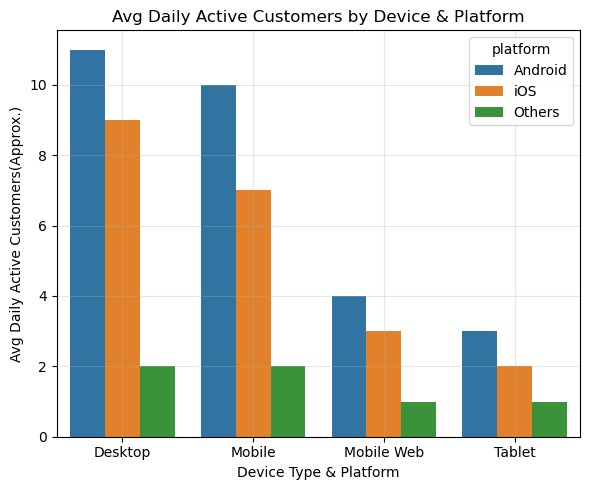

In [2346]:
# Bar plot - Avg Daily Active Customers by Device Type/Platform

plt.figure(figsize=(6,5))
sns.barplot(data=device_summary, x='device_type', y='avg_daily_active_customers', hue='platform')
plt.title("Avg Daily Active Customers by Device & Platform")
plt.xlabel("Device Type & Platform")
plt.ylabel("Avg Daily Active Customers(Approx.)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<ul>
<li><b>Desktop/Mobile users</b> - show high avg daily active customers in Andriod followed by iOS</li>
</ul>
</div>

In [2348]:
# Calulate all conversion metric by device/platform

device_platform_summary=df.groupby(['device_type', 'platform']).agg({
    'impressions': 'sum',
    'views': 'sum',
    'wishlist_adds': 'sum',
    'cart_adds': 'sum',
    'items_purchased': 'sum'
}).reset_index()

device_platform_summary['CTR'] = (device_platform_summary['views'] / device_platform_summary['impressions']*100).round(2)
device_platform_summary['add_to_cart_rate'] = (device_platform_summary['cart_adds'] / device_platform_summary['views']*100).round(2)
device_platform_summary['conversion_rate'] = (device_platform_summary['items_purchased'] / device_platform_summary['views']*100).round(2)
device_platform_summary.sort_values(by='conversion_rate',ascending=False)

,device_type,platform,impressions,views,wishlist_adds,cart_adds,items_purchased,CTR,add_to_cart_rate,conversion_rate
2,Desktop,iOS,10534051,1693475,33868,142187,39324,16.08,8.40,2.32
0,Desktop,Android,13193000,1905727,38669,144601,35943,14.44,7.59,1.89
11,Tablet,iOS,2591923,368624,7120,27530,6639,14.22,7.47,1.80
1,Desktop,Others,2802212,383887,7782,27530,6458,13.70,7.17,1.68
5,Mobile,iOS,9127334,1216848,24313,84770,19566,13.33,6.97,1.61
9,Tablet,Android,3413611,458758,9260,31550,7257,13.44,6.88,1.58
10,Tablet,Others,687857,83801,1624,5594,1273,12.18,6.68,1.52
8,Mobile Web,iOS,4062162,508594,9976,32981,7046,12.52,6.48,1.39
3,Mobile,Android,11800721,1420438,28380,89243,18238,12.04,6.28,1.28
6,Mobile Web,Android,5079477,575256,11664,33833,6633,11.33,5.88,1.15


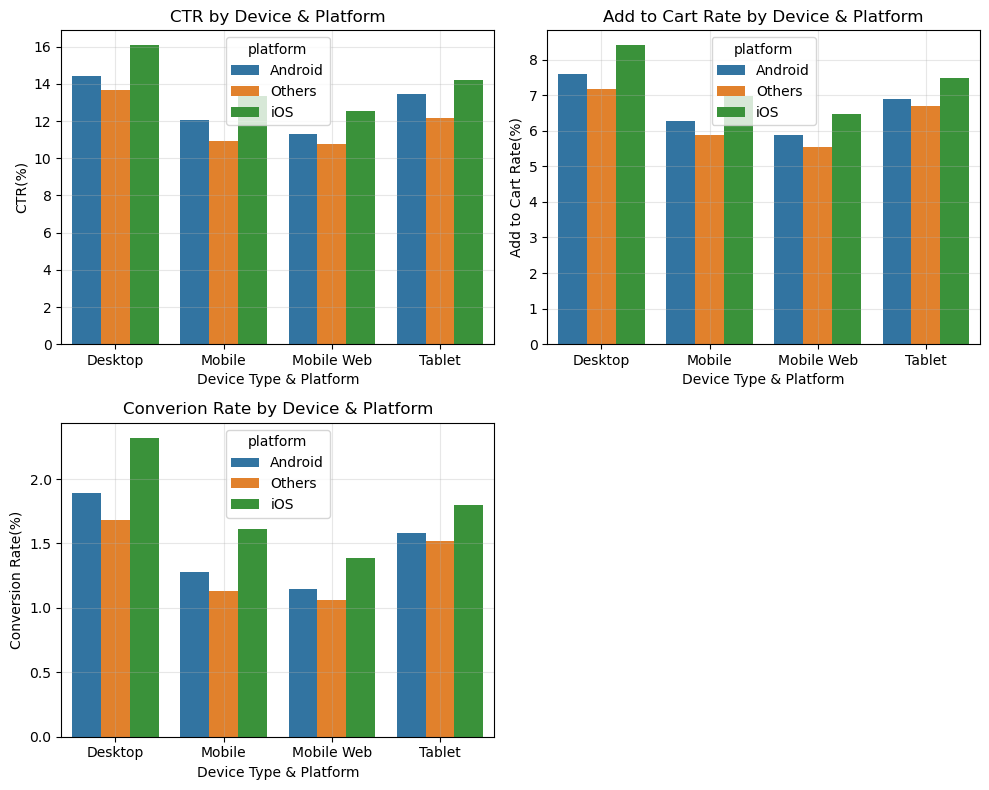

In [2349]:
plt.figure(figsize=(10,8))

# Bar plot - CTR by Device/Platform
plt.subplot(2,2,1)
sns.barplot(data=device_platform_summary, x='device_type', y='CTR', hue='platform')
plt.title("CTR by Device & Platform")
plt.xlabel("Device Type & Platform")
plt.ylabel("CTR(%)")
plt.grid(alpha=0.3)

# Bar plot - Add to Cart Rate by Device/Platform

plt.subplot(2,2,2)
sns.barplot(data=device_platform_summary, x='device_type', y='add_to_cart_rate', hue='platform')
plt.title("Add to Cart Rate by Device & Platform")
plt.xlabel("Device Type & Platform")
plt.ylabel("Add to Cart Rate(%)")
plt.grid(alpha=0.3)

# Bar plot - Converion Rate by Device/Platform

plt.subplot(2,2,3)
sns.barplot(data=device_platform_summary, x='device_type', y='conversion_rate', hue='platform')
plt.title("Converion Rate by Device & Platform")
plt.xlabel("Device Type & Platform")
plt.ylabel("Conversion Rate(%)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

 
<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<ul>
<li><b>Desktop (iOS) and Tablet(iOS)</b> has the highest CTR and add_to_cart_rate, leading to highest conersion rate.</li><br>
<li><b>Mobile (Others) and Mobile Web(Others)</b> see the lowest CTR leading to lowest conversion rate.</li>
</ul>
</div>

<div style="background-color:#fdecef; padding:10px; border-radius:8px;">
<b>COUNTRY-LEVEL ANALYSIS</b>


In [2352]:
# Calculate conversions metric by country
country_summary=df.groupby('country')[['visits','no_of_customers','session_duration',\
                                              'impressions', 'views','wishlist_adds', 'cart_adds', 'items_purchased']].sum().reset_index()
country_summary.sort_values(by='items_purchased',ascending=False)

,country,visits,no_of_customers,session_duration,impressions,views,wishlist_adds,cart_adds,items_purchased
5,United Kingdom,10004,5899,9855.93,11082847,1691951,34165,132723,36482
1,Germany,9935,5981,9816.67,11112471,1622043,32559,121708,32403
0,France,9655,5911,9555.22,10870092,1449732,29048,103452,23357
3,Italy,10512,6326,10201.39,11359330,1431898,28265,97199,21063
2,Ireland,9956,5903,9769.47,11114936,1409235,28289,95200,20944
4,Spain,10024,6036,9992.19,10981542,1361696,27150,89810,18010


In [2353]:
# CTR
country_summary['CTR'] = (country_summary['views'] / country_summary['impressions'] * 100).round(2)

# Add-to-Cart Rate
country_summary['add_to_cart_rate'] = (country_summary['cart_adds'] / country_summary['views'] * 100).round(2)

# Conversion Rate
country_summary['conversion_rate']=(country_summary['items_purchased']/country_summary['views']*100).round(2)

country_summary.sort_values(by='conversion_rate',ascending=False)

,country,visits,no_of_customers,session_duration,impressions,views,wishlist_adds,cart_adds,items_purchased,CTR,add_to_cart_rate,conversion_rate
5,United Kingdom,10004,5899,9855.93,11082847,1691951,34165,132723,36482,15.27,7.84,2.16
1,Germany,9935,5981,9816.67,11112471,1622043,32559,121708,32403,14.60,7.50,2.00
0,France,9655,5911,9555.22,10870092,1449732,29048,103452,23357,13.34,7.14,1.61
2,Ireland,9956,5903,9769.47,11114936,1409235,28289,95200,20944,12.68,6.76,1.49
3,Italy,10512,6326,10201.39,11359330,1431898,28265,97199,21063,12.61,6.79,1.47
4,Spain,10024,6036,9992.19,10981542,1361696,27150,89810,18010,12.40,6.60,1.32


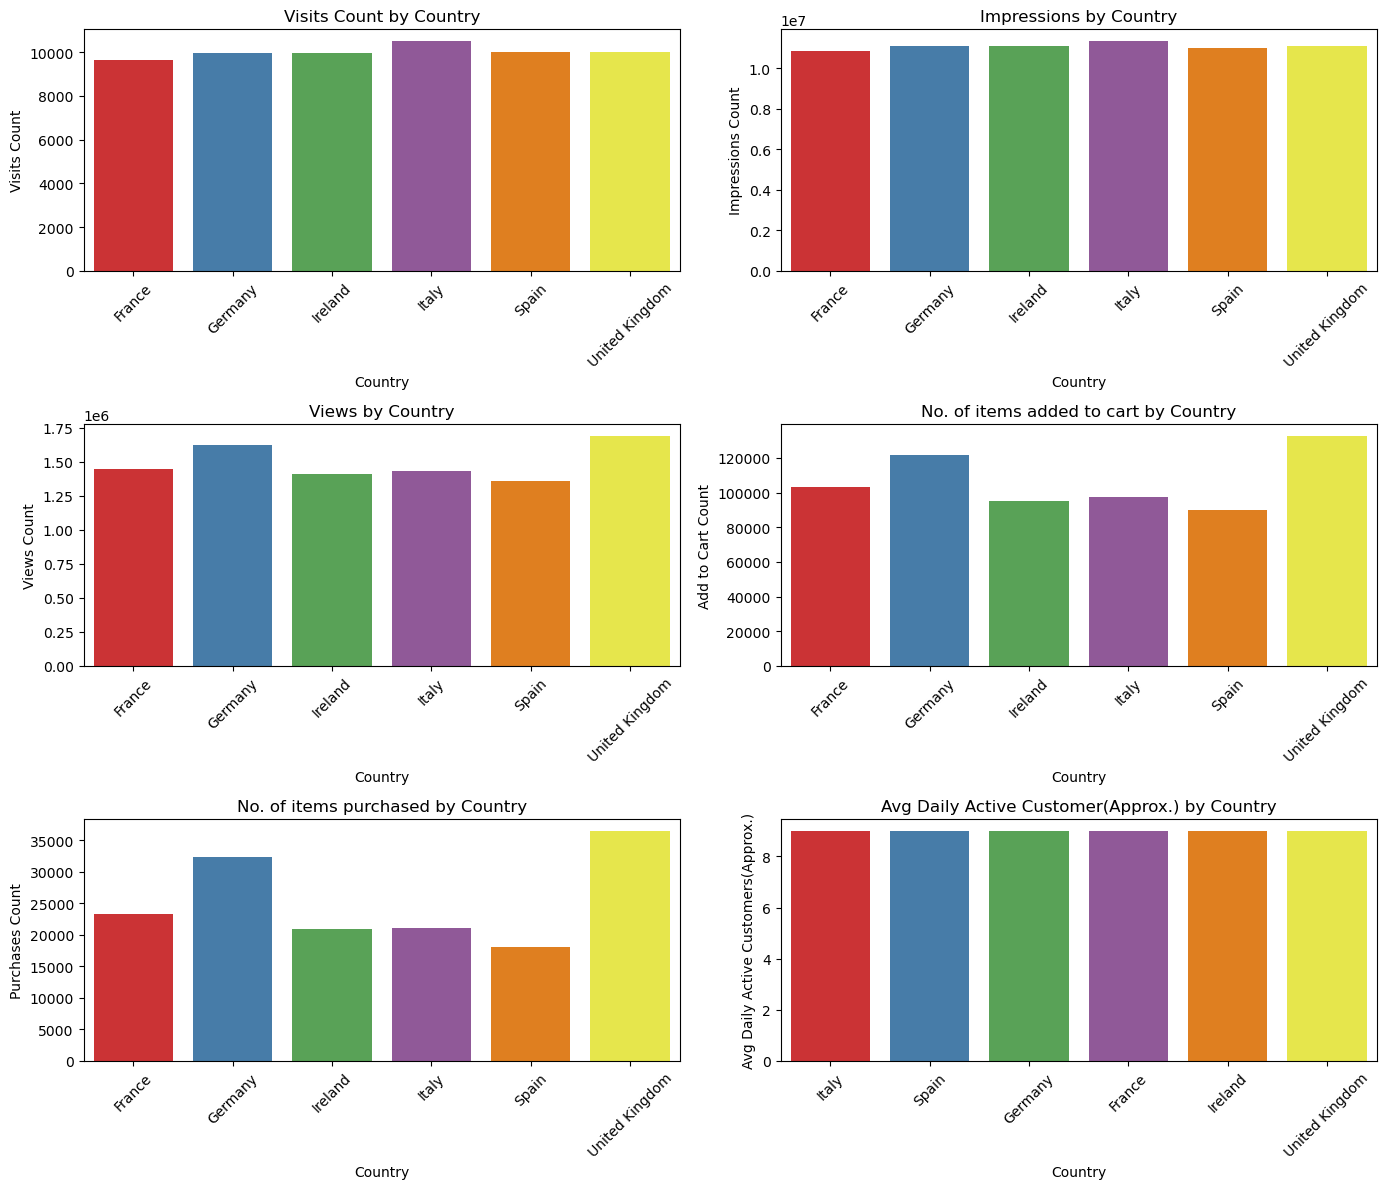

In [2354]:
# ----------------------------------------------------------------------------
# Visits, customers,impressions,views,cart_adds and purchase counts by country
# ----------------------------------------------------------------------------

plt.figure(figsize=(14, 12))

#Count of visits by Country
plt.subplot(3,2,1)
sns.barplot(data=country_summary,x='country',y='visits',palette='Set1')
plt.title("Visits Count by Country")
plt.xlabel("Country")
plt.ylabel("Visits Count")
plt.tick_params(axis='x', rotation=45)

#impression  by Country
plt.subplot(3,2,2)
sns.barplot(data=country_summary,x='country',y='impressions',palette='Set1')
plt.title("Impressions by Country")
plt.xlabel("Country")
plt.ylabel("Impressions Count")
plt.tick_params(axis='x', rotation=45)

#views by Country
plt.subplot(3,2,3)
sns.barplot(data=country_summary,x='country',y='views',palette='Set1')
plt.title("Views by Country")
plt.xlabel("Country")
plt.ylabel("Views Count")
plt.tick_params(axis='x', rotation=45)

#add to cart count by Country
plt.subplot(3,2,4)
sns.barplot(data=country_summary,x='country',y='cart_adds',palette='Set1')
plt.title("No. of items added to cart by Country")
plt.xlabel("Country")
plt.ylabel("Add to Cart Count")
plt.tick_params(axis='x', rotation=45)

#items purchased count by Country
plt.subplot(3,2,5)
sns.barplot(data=country_summary,x='country',y='items_purchased',palette='Set1')
plt.title("No. of items purchased by Country")
plt.xlabel("Country")
plt.ylabel("Purchases Count")
plt.tick_params(axis='x', rotation=45)

# ------------------------------------------
# Avg Daily Active Customer Count by Country
# -------------------------------------------

monthly_country_customers = (
    df.groupby(["year", "month", "country"])["no_of_customers"]
    .sum()
    .reset_index()
)
# ---- Calculate Days in Each Month ----
monthly_country_customers["days_in_month"] = (
    pd.PeriodIndex(
        pd.to_datetime(
            monthly_channel_customers["year"].astype(str) + "-" + monthly_channel_customers["month"].astype(str)
        ),
        freq="M"
    ).days_in_month
)
# ---- Calculate Avg Daily Active Customers ----
monthly_country_customers["avg_daily_active_customers"] = (
    monthly_country_customers["no_of_customers"] / monthly_country_customers["days_in_month"]
).round(2)
# ---- Aggregate by Country Across Months ----
country_summary_cust = (
    monthly_country_customers.groupby("country")["avg_daily_active_customers"]
    .mean()
    .reset_index()
    .sort_values("avg_daily_active_customers", ascending=False)
)
country_summary_cust["avg_daily_active_customers"] = (country_summary_cust["avg_daily_active_customers"].round().astype(int))
plt.subplot(3,2,6)
sns.barplot(data=country_summary_cust,x='country',y='avg_daily_active_customers',palette='Set1')
plt.title("Avg Daily Active Customer(Approx.) by Country")
plt.xlabel("Country")
plt.ylabel("Avg Daily Active Customers(Approx.)")
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

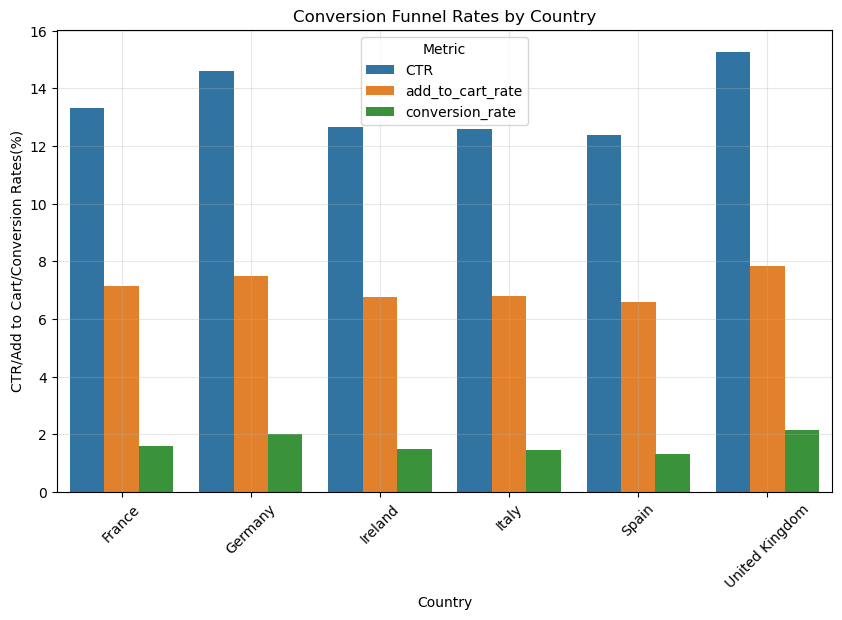

In [2355]:
# ------------------------------------------------------------
# BARPLOT : CTR, ADD_TO_CART_RATE & CONVERSION_RATE BY COUNTRY
# ----------------------------------------------------------

country_summary_rate = country_summary[['country','CTR', 'add_to_cart_rate', 'conversion_rate']]
country_summary_rate = pd.melt(country_summary_rate, id_vars='country', var_name='Metric', value_name='Rate')

sns.barplot(data=country_summary_rate, x='country', y='Rate', hue='Metric')
plt.title("Conversion Funnel Rates by Country")
plt.xlabel("Country")
plt.ylabel("CTR/Add to Cart/Conversion Rates(%)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

 
<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li>Italy has highest number of visits/session and impresions but lesser number of views,cart_adds and items_purchased than France,Germany      and UK leading to lower conversion_rate.</li>
<li><b>Ireland</b> is having lower number visits,impression,views,cart_adds and items_purchased than Italy, yet Ireland has slightly better                ctr,add_to_cart_rate & conversion_rate than Italy. This signify volume vs efficiency in Italy and Irelnd indicating Italy maybe driving a    large volume of low-quality, inefficient traffic, while Ireland is driving a smaller volume of high-quality, high-intent traffic.</li>
<li>Spain has good number of visits/impression but comparateively perform lower in number visits,impression,views,cart_adds and                  items_purchased leading lower rate metrics.</li>
<li><b>Average Daily Active Customer is same across all countries.</b> They are pulling the similar number of active customers in a daily basis.</li>
</ul>
</div>

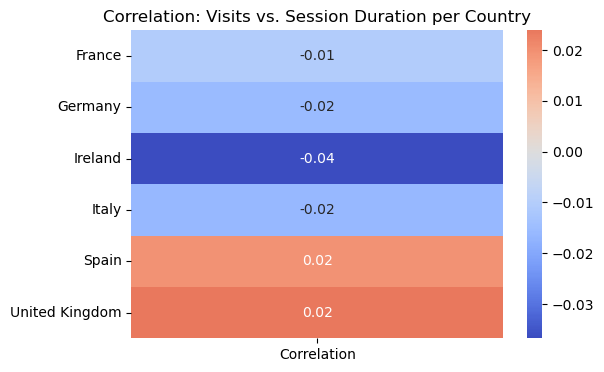

In [2357]:
# -----------------------------------------------------
# Correlation: Visits vs. Session Duration per Country
# -----------------------------------------------------

corr_data = (
    df.groupby('country')
      .apply(lambda x: x['visits'].corr(x['session_duration']))
      .reset_index(name='Correlation')
)
# Pivot for heatmap (country as row)
corr_pivot = corr_data.pivot_table(index='country', values='Correlation')

plt.figure(figsize=(6,4))
sns.heatmap(corr_pivot, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation: Visits vs. Session Duration per Country")
plt.ylabel("")
plt.show()

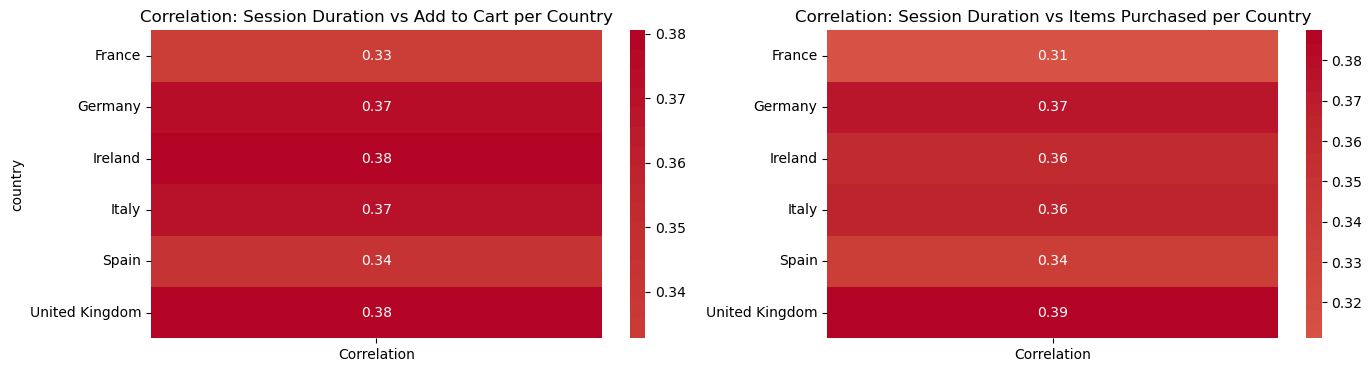

In [2358]:
# ---------------------------------------------------------
# Correlation: Session Duration vs Add to Cart per Country
# ---------------------------------------------------------

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
corr_data_cart = (
    df.groupby('country')
      .apply(lambda x: x['session_duration'].corr(x['cart_adds']))
      .reset_index(name='Correlation')
)
# Pivot for heatmap (country as row)
corr_pivot_cart = corr_data_cart.pivot_table(index='country', values='Correlation')

#plt.figure(figsize=(6,4))
sns.heatmap(corr_pivot_cart, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation: Session Duration vs Add to Cart per Country")

# -------------------------------------------------------------
# Correlation: Session Duration vs Items Purchased per Country
# -------------------------------------------------------------

plt.subplot(1,2,2)
corr_data_purchase = (
    df.groupby('country')
      .apply(lambda x: x['session_duration'].corr(x['items_purchased']))
      .reset_index(name='Correlation')
)
# Pivot for heatmap (country as row)
corr_pivot_purchase = corr_data_purchase.pivot_table(index='country', values='Correlation')

#plt.figure(figsize=(6,4))
sns.heatmap(corr_pivot_purchase, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation: Session Duration vs Items Purchased per Country")
plt.ylabel("")
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<ul>
<li>Correlation: Visits vs. Session Duration per Country - very low or nearly zero correlation indicating more traffic doesn’t necessarily       mean deeper engagement.</li><br>
<li>Correlation: Session Duration vs Add to Cart per Country(0.33-0.38) & Session Duration vs Items Purchase per country (0.31-0.39) - a         moderate correlation - mirroring overall correlation: Session Duration vs Add to Cart per Country(0.36) & Session Duration vs Items          Purchase per country(0.34).
   This suggest duration is secondary. While the link is slightly positive, it is only a moderate correlation. Time spent could be a side       effect of research, not the cause of buying or could also be possible that few longer user sessions tend to drive some buying intent.        Optimization should NOT give primary focus to duration on the basis of this correlation and further investigation is needed for any conclusion.</li>
</ul>
</div>


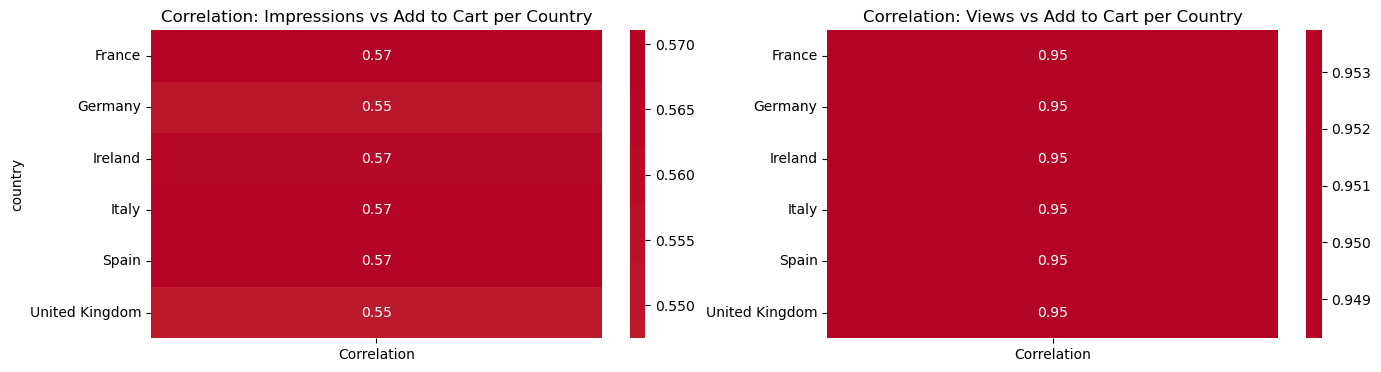

In [2360]:
# ----------------------------------------------------
# Correlation: Impressions vs Add to Cart per Country
# ----------------------------------------------------

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
corr_data_impr = (
    df.groupby('country')
      .apply(lambda x: x['impressions'].corr(x['cart_adds']))
      .reset_index(name='Correlation')
)
corr_pivot_impr = corr_data_impr.pivot_table(index='country', values='Correlation')
sns.heatmap(corr_pivot_impr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation: Impressions vs Add to Cart per Country")

# -----------------------------------------------
# Correlation: Views vs Add to Cart per Country
# -----------------------------------------------

plt.subplot(1,2,2)
corr_data_views = (
    df.groupby('country')
      .apply(lambda x: x['views'].corr(x['cart_adds']))
      .reset_index(name='Correlation')
)
corr_pivot_views = corr_data_views.pivot_table(index='country', values='Correlation')
sns.heatmap(corr_pivot_views, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation: Views vs Add to Cart per Country")
plt.ylabel("")
plt.show()

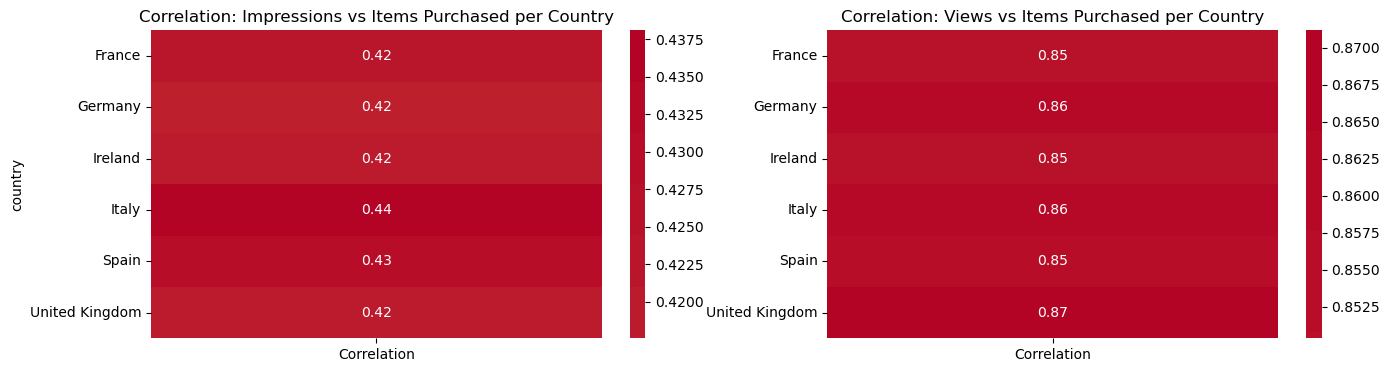

In [2361]:
# ---------------------------------------------------------
# Correlation: Impressions vs Items Purchased per Country
# ----------------------------------------------------------

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
corr_data_impr = (
    df.groupby('country')
      .apply(lambda x: x['impressions'].corr(x['items_purchased']))
      .reset_index(name='Correlation')
)
corr_pivot_impr = corr_data_impr.pivot_table(index='country', values='Correlation')
sns.heatmap(corr_pivot_impr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation: Impressions vs Items Purchased per Country")

# --------------------------------------------------
# Correlation: Views vs Items Purchased per Country
# ---------------------------------------------------

plt.subplot(1,2,2)
corr_data_views = (
    df.groupby('country')
      .apply(lambda x: x['views'].corr(x['items_purchased']))
      .reset_index(name='Correlation')
)
corr_pivot_views = corr_data_views.pivot_table(index='country', values='Correlation')
sns.heatmap(corr_pivot_views, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation: Views vs Items Purchased per Country")
plt.ylabel("")
plt.show()


<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<ul>
<li>Correlation :<br>
   Impressions vs Add to Cart per Country(0.55-0.57) - mirroring the overall correlation 0.55<br>
   Impressions vs Items Purchased per Country(0.42-43) - mirroring the overall correlation 0.40<br>
   This discovery is the Bottleneck: Impressions (seeing items on category pages, search results, or home page) have only a moderate link to    the final actions. This could mean users are struggling in the discovery phase. They see many products, but most are not relevant enough     to click and view. This is where users are being lost.</li><br>
<li>Correlation : <b>Views vs Add to Cart per Country(0.95)</b> - mirroring the overall correlation 0.95.<br>
   <b>Views vs Items Purchased per Country(0.85-0.87)</b> - mirroring the overall correlation 0.85.<br>  
   Suggests a linear purchase funnel: more product views > more engagement > more sales.</li>
</ul>
</div>


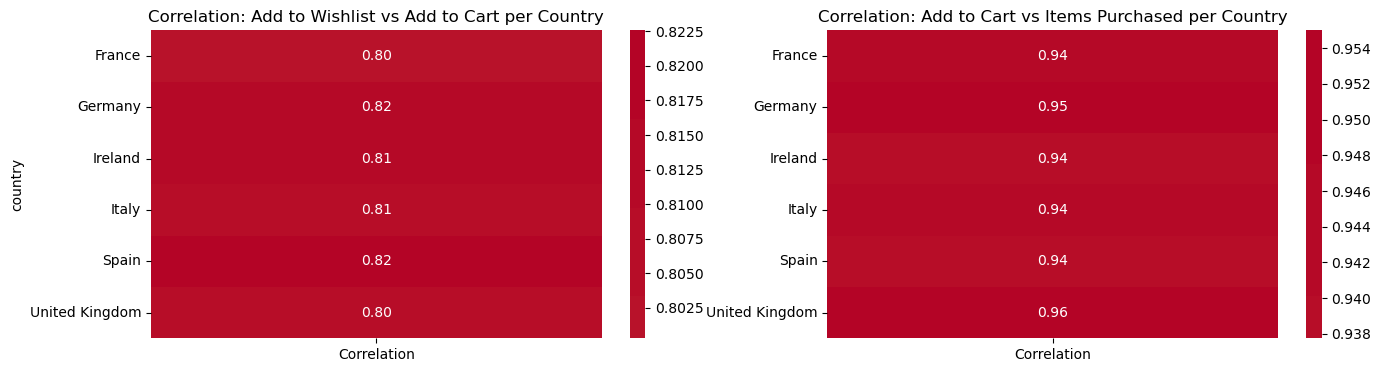

In [2363]:
# ----------------------------------------------------------
# Correlation: Add to Wishlist vs Add to Cart per Country
# ----------------------------------------------------------

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
corr_data_wishlist = (
    df.groupby('country')
      .apply(lambda x: x['wishlist_adds'].corr(x['cart_adds']))
      .reset_index(name='Correlation')
)
corr_pivot_wishlist = corr_data_wishlist.pivot_table(index='country', values='Correlation')
sns.heatmap(corr_pivot_wishlist, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation: Add to Wishlist vs Add to Cart per Country")

# ----------------------------------------------------------
# Correlation: Add to Cart vs Items Purchased per Country
# ----------------------------------------------------------

plt.subplot(1,2,2)
corr_data_cart = (
    df.groupby('country')
      .apply(lambda x: x['cart_adds'].corr(x['items_purchased']))
      .reset_index(name='Correlation')
)
corr_pivot_cart = corr_data_cart.pivot_table(index='country', values='Correlation')
sns.heatmap(corr_pivot_cart, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation: Add to Cart vs Items Purchased per Country")
plt.ylabel("")
plt.show()


<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li>Correlation: Add to Wishlist vs Add to Cart per Country(0.80-0.82) - mirroring the overall correlation 0.81.<br>
   <b>Correlation: Add to Cart vs Items Purchased per Country(0.94-0.96)</b> - mirroring the overall correlation 0.94.<br>
This indicates that users who engage in one tend to engage in the other. A strong intent-to-conversion linkage.</li><br>
<li><b>Brief Summary on Correlation Analysis by Country & Limitations/Assumption:</b><br>
  Visits and session duration show almost no correlation, suggesting that higher traffic volume does not necessarily translate into deeper     engagement. However, there is a moderate positive correlations between session duration and both add-to-cart and purchase rates. Exposure metrics       also reveal a progressive relationship: impressions moderately correlate with add-to-cart and purchase activity, while views  demonstrate    a very strong association with both add-to-cart and purchase, confirming the linear nature of the purchase funnel. High correlations         between add-to-cart and purchase highlight strong intent once users reach the cart stage.</li> <br>
<b>NOTE:</b>
  Given the aggregate and synthetic nature of the dataset, results should be interpreted cautiously. Correlations may reflect modeled          dependencies rather than true causal relationships, and limited variation across countries constrains geographic insights. To develop        actionable strategies, future analysis should incorporate user-level behavioral data, campaign identifiers, and temporal variation to        validate these observed relationships.
</ul>
</div>

In [2365]:
df.head()

,date,country,traffic_channel,device_type,platform,visits,session_duration,no_of_customers,impressions,views,wishlist_adds,cart_adds,items_purchased,year,month,day_of_week
0,2024-01-26,Ireland,Paid,Tablet,Android,4,3.45,1,7768,743,8,26,7,2024,1,Friday
1,2024-09-07,Ireland,Organic,Desktop,Android,3,5.17,2,11615,1910,25,178,35,2024,9,Saturday
2,2024-04-14,Germany,Direct,Desktop,Android,7,5.21,2,9680,2189,52,213,77,2024,4,Sunday
3,2025-07-12,Ireland,Organic,Desktop,iOS,7,3.27,6,10914,2218,39,210,54,2025,7,Saturday
4,2025-03-08,United Kingdom,Organic,Mobile,iOS,3,4.14,3,3628,675,17,59,19,2025,3,Saturday


In [2366]:
# create monthly_data grouping by year & month
monthly_data = df.groupby(['year', 'month'])[['visits','impressions','views','cart_adds','items_purchased']].sum()

# ---- create columns ctr,add_to_cart_rate & conversion_rate -----
# ctr
monthly_data['ctr'] = (monthly_data['views'] / monthly_data['impressions']*100).round(2)

# add_to_cart_rate
monthly_data['add_to_cart_rate'] = (monthly_data['cart_adds'] / monthly_data['views']*100).round(2)

# conversion_rate
monthly_data['conversion_rate'] = (monthly_data['items_purchased'] / monthly_data['views']*100).round(2)
monthly_data

visits  impressions   views  cart_adds  items_purchased    ctr  \
year month                                                                   
2024 1        2944      3234967  434213      30792             7300  13.42   
     2        2649      3014411  409416      29426             7061  13.58   
     3        2873      3116438  431592      31063             7640  13.85   
     4        2993      3336351  458758      33360             8120  13.75   
     5        2967      3310334  443173      31438             7427  13.39   
     6        2818      3035415  402749      28374             6743  13.27   
     7        2807      3231904  452512      32742             7939  14.00   
     8        2736      3027887  401678      27775             6358  13.27   
     9        2803      3119440  417473      29618             6842  13.38   
     10       2659      2861815  381928      26813             6212  13.35   
     11       2950      3227910  433623      30960             7190  13.43   
     12       2759      2971661  397207      28389             6983  13.37   
2025 1        2780      3108298  429403      31017             7511  13.81   
     2        2521      2766690  377660      27380             6567  13.65   
     3        2785      3033170  406124      29211             7173  13.39   
     4        2688      3037501  407122      29189             6899  13.40   
     5        2805      3091443  404858      29104             6848  13.10   
     6        2626      3024957  405397      28667             6622  13.40   
     7        2785      3165273  423022      30371             7105  13.36   
     8        2830      3088819  423202      30365             7354  13.70   
     9        2620      2896299  379745      26592             6169  13.11   
     10       1688      1820235  245700      17446             4196  13.50   

            add_to_cart_rate  conversion_rate  
year month                                     
2024 1                  7.09             1.68  
     2                  7.19             1.72  
     3                  7.20             1.77  
     4                  7.27             1.77  
     5                  7.09             1.68  
     6                  7.05             1.67  
     7                  7.24             1.75  
     8                  6.91             1.58  
     9                  7.09             1.64  
     10                 7.02             1.63  
     11                 7.14             1.66  
     12                 7.15             1.76  
2025 1                  7.22             1.75  
     2                  7.25             1.74  
     3                  7.19             1.77  
     4                  7.17             1.69  
     5                  7.19             1.69  
     6                  7.07             1.63  
     7                  7.18             1.68  
     8                  7.18             1.74  
     9                  7.00             1.62  
     10                 7.10             1.71

<div style="background-color:#fdecef; padding:10px; border-radius:8px;">
<b>TIME-BASED ANALYSIS</b>


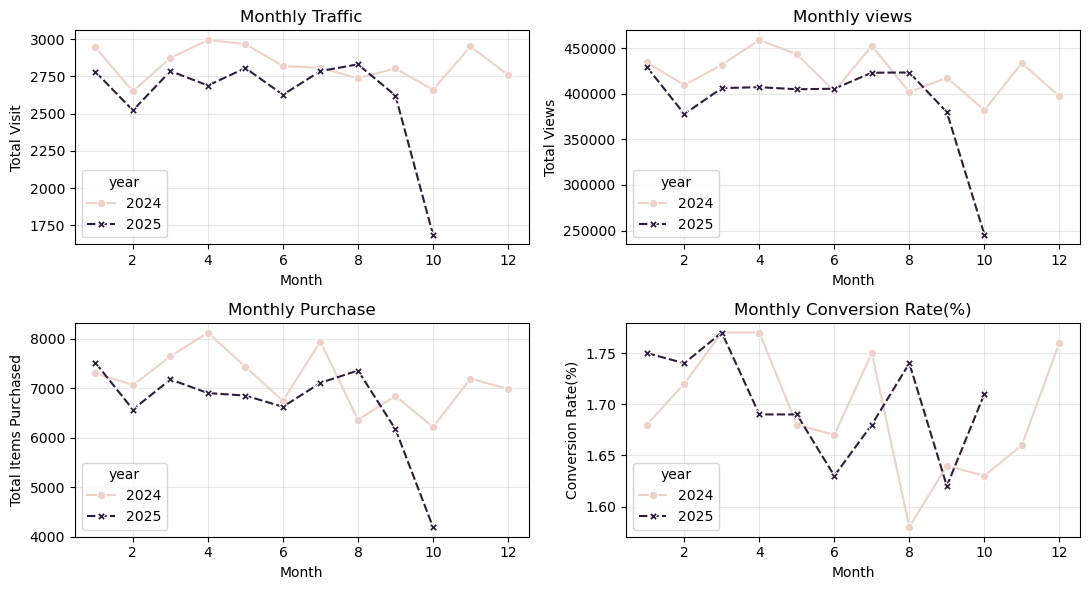

In [2368]:
# ------------------------------------------------------------------
# year-on-year monthly traffic - Total Visits/Views/Items Purchased
# ------------------------------------------------------------------

plt.figure(figsize=(11,6))

# ---- Monthly traffic - visits ----
plt.subplot(2,2,1)
sns.lineplot(data=monthly_data, x='month', y='visits', hue='year',style='year', markers=True)
plt.title("Monthly Traffic")
plt.xlabel('Month')
plt.ylabel("Total Visit")
plt.grid(alpha=0.3)

# ---- Monthly views ----
plt.subplot(2,2,2)
sns.lineplot(data=monthly_data, x='month', y='views',hue='year', style='year', markers=True)
plt.title("Monthly views")
plt.xlabel('Month')
plt.ylabel("Total Views")
plt.grid(alpha=0.3)

# ---- Monthly Purchase ----
plt.subplot(2,2,3)
sns.lineplot(data=monthly_data, x='month', y='items_purchased',hue='year', style='year', markers=True)
plt.title("Monthly Purchase")
plt.xlabel('Month')
plt.ylabel("Total Items Purchased")
plt.grid(alpha=0.3)

# ---- Monthly conversion_rate ----
plt.subplot(2,2,4)
sns.lineplot(data=monthly_data, x='month', y='conversion_rate',hue='year', style='year', markers=True)
plt.title("Monthly Conversion Rate(%)")
plt.xlabel('Month')
plt.ylabel("Conversion Rate(%)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [2369]:
# ---------------------------------------------------------------------------------
# Absolute & Percentage Difference between Monthly Total purchase in 2024 vs. 2025
# ---------------------------------------------------------------------------------

monthly_pivot = monthly_data.reset_index().pivot(index='month', columns='year', values='items_purchased')

# --- CLEANUP BEFORE DIFFERENCE CALCULATION ---
# Remove hierarchical column index 
monthly_pivot.columns = monthly_pivot.columns.astype(str)  # convert numeric columns to strings
monthly_pivot.columns.name = None                          # remove the 'year' label
monthly_pivot = monthly_pivot.reset_index()                # make 'month' a normal column

# Ensure numeric types
monthly_pivot['2024'] = pd.to_numeric(monthly_pivot['2024'], errors='coerce')
monthly_pivot['2025'] = pd.to_numeric(monthly_pivot['2025'], errors='coerce')

# Calculate absolute difference 
monthly_pivot['diff_2025_vs_2024'] = monthly_pivot['2025'] - monthly_pivot['2024']

# Calculate percentage difference 
monthly_pivot['pct_diff_2025_vs_2024'] = ((monthly_pivot['diff_2025_vs_2024'] / monthly_pivot['2024'].replace(0, pd.NA)) * 100).round(2)

# Fill missing percentage values
monthly_pivot['pct_diff_2025_vs_2024'] = monthly_pivot['pct_diff_2025_vs_2024'].fillna(0)

# View table
print(monthly_pivot.to_markdown(index=False, numalign="left",tablefmt="grid"))

+---------+--------+--------+---------------------+-------------------------+
| month   | 2024   | 2025   | diff_2025_vs_2024   | pct_diff_2025_vs_2024   |
+=========+========+========+=====================+=========================+
| 1       | 7300   | 7511   | 211                 | 2.89                    |
+---------+--------+--------+---------------------+-------------------------+
| 2       | 7061   | 6567   | -494                | -7                      |
+---------+--------+--------+---------------------+-------------------------+
| 3       | 7640   | 7173   | -467                | -6.11                   |
+---------+--------+--------+---------------------+-------------------------+
| 4       | 8120   | 6899   | -1221               | -15.04                  |
+---------+--------+--------+---------------------+-------------------------+
| 5       | 7427   | 6848   | -579                | -7.8                    |
+---------+--------+--------+---------------------+-------------

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li>Across all metrics (visits, views, purchases,conversion rate), 2025 consistently underperforms compared to 2024 for almost every month. Both years show similar seasonal pattern with slight fluctuation. Indicates consistent customer behavior and engagement cycles. There is a big dip in volume in April,2025 leading to a lower conversion rate compared to April, 2024.
August, 2025 sees a huge rise in purchase than August, 2024 which yields better conversion rate for August, 2025(1.74%) than August, 2024(1.58%).</li><br>
<li><b>April 2025 (−15 %)</b> - Largest drop and <b>August 2025 (+15.7 %)</b> - Only strong growth month. Replicate August’s success: Identify what drove the spike and scale that strategy. Investigate April month month engagement gap.<br> Our next focus in future analysis should be on all conversion metric trends to confirm efficiency consistency.</li>
<br>  
<b>NOTE:</b>
The steep decline in visits, views & purchases for October 2025 isn’t due to business performance — it’s purely a data completeness artifact. Dataset is not covering complete October month of 2025.
Missing or incomplete data for Nov–Dec 2025 prevents a full holiday-season comparison.
</ul>
</div>


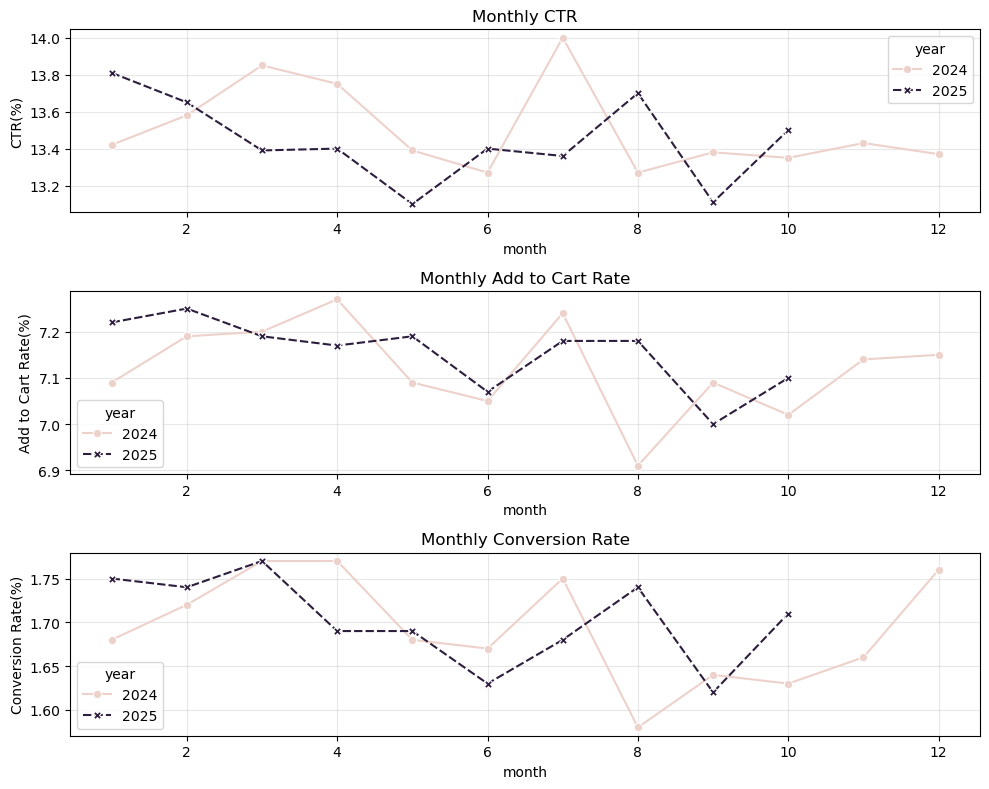

In [2371]:

# ---------------------------------------------------------------
#  Year-on-Year - Monthly CTR, Add-to-Cart Rate, Conversion Rate
# ----------------------------------------------------------------

plt.figure(figsize=(10,8))

# ---- Monthly ctr ----
plt.subplot(3,1,1)
sns.lineplot(data=monthly_data, x='month', y='ctr', hue='year',style='year', markers=True)
plt.title("Monthly CTR")
plt.ylabel('CTR(%)')
plt.grid(alpha=0.3)

# ---- Monthly add_to_cart_rate ----
plt.subplot(3,1,2)
sns.lineplot(data=monthly_data, x='month', y='add_to_cart_rate',hue='year', style='year', markers=True)
plt.title("Monthly Add to Cart Rate")
plt.ylabel('Add to Cart Rate(%)')
plt.grid(alpha=0.3)

# ---- Monthly conversion_rate ----
plt.subplot(3,1,3)
sns.lineplot(data=monthly_data, x='month', y='conversion_rate',hue='year', style='year', markers=True)
plt.title("Monthly Conversion Rate")
plt.ylabel('Conversion Rate(%)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li><b>Top-of-Funnel:</b>Monthly CTR (Click-Through Rate) : CTR in 2025 remains slightly below 2024 in most months, except around June & August where it recovers. Overall CTR in both year is around ~(13-14)%.</li><br>
<li><b>Mid-Funnel:</b>Add-to-Cart Rate : Performance between 2024 and 2025 is very similar (~7%), indicating that site engagement and product appeal remain consistent.</li><br>
<li><b>Bottom-of-Funnel:</b> Conversion Rate: 2025 starts strong (Jan–Mar) — conversion rates exceed 2024 significantly. Drops sharply around April–June, then mirror 2024 with slight fluctuation. Spike in August,2025.</li><br>
<li>2025 conversion rate ranges from 1.63% to 1.77%, consistently above or equal to 2024 except for April–July. Best improvement seen in Q1      2025 (Jan–Mar). April dip (1.69%) is the only significant underperformance comapred to 2024.</li><br>
<li>Need to invegtigate April-July month to deep dive through the performance gap. Study August spike in depth.</li>
</ul>
</div>

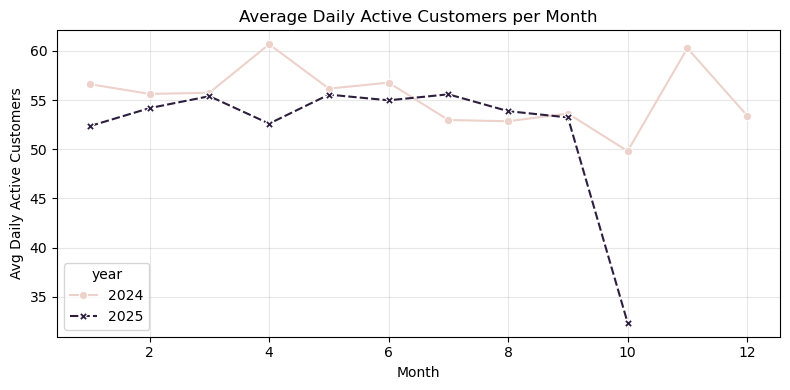

In [2373]:
# --- Griup customers by year and month ---
monthly_customers = (
    df.groupby(["year", "month"])["no_of_customers"]
    .sum()
    .reset_index()
)
# ---- Compute Days in Month ----
monthly_customers["days_in_month"] = (
    pd.PeriodIndex(
        pd.to_datetime(
            monthly_customers["year"].astype(str) + "-" + monthly_customers["month"].astype(str)
        ),
        freq="M"
    ).days_in_month
)
# ---- Calculate Avg Daily Active Customers ----
monthly_customers["avg_daily_active_customers"] = (
    monthly_customers["no_of_customers"] / monthly_customers["days_in_month"]
).round(2)
# ---- Plot ----
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_customers, x='month', y='avg_daily_active_customers',hue='year', style='year', markers=True)
plt.title("Average Daily Active Customers per Month")
plt.xlabel("Month")
plt.ylabel("Avg Daily Active Customers")
plt.grid(alpha=0.3)
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<b>April</b> and  <b>November</b> Months see the highest number of avg daily activer customers per month in 2024. 2025 trend follow the same pattern as 2024 with slight fluctuation except for <b>April</b> month where we see a clear dip in avg daily activer customers per month compared to 2024.
Further analysis is recommended to find the reason for drop in the April month.
</div>

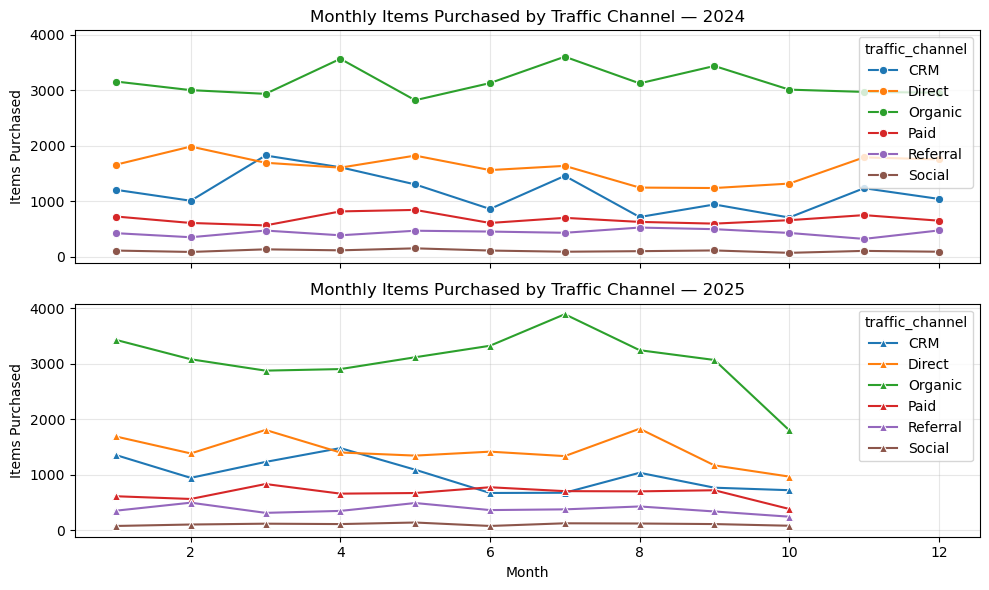

In [2375]:
# --------------------------------------------------
#  Items Purchased - Time Trends by Traffic Channel 
# --------------------------------------------------

# Monthly items purchased(2024-2025) by Traffic Channel
monthly_channel_purchase = df.groupby(['year', 'month', 'traffic_channel']).items_purchased.sum().reset_index()

# Filter data by year
data_2024 = monthly_channel_purchase[monthly_channel_purchase['year'] == 2024]
data_2025 = monthly_channel_purchase[monthly_channel_purchase['year'] == 2025]

# Create two subplots — one for each year
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)

# ---- Plot 2024 ----
sns.lineplot(
    data=data_2024, 
    x='month', y='items_purchased', hue='traffic_channel', 
    marker='o', ax=axes[0]
)
axes[0].set_title("Monthly Items Purchased by Traffic Channel — 2024")
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Items Purchased')
axes[0].grid(alpha=0.3)

# ---- Plot 2025 ----
sns.lineplot(
    data=data_2025, 
    x='month', y='items_purchased', hue='traffic_channel', 
    marker='^', ax=axes[1]
)
axes[1].set_title("Monthly Items Purchased by Traffic Channel — 2025")
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Items Purchased')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li>The overall purchase trend in 2025 mirrors 2024 but at slightly lower levels across most channels, especially toward Q3–Q4 (likely due  to incomplete October data).</li><br>
<li><b>Organic traffic </b>remains the dominant channel in both years in terms of items purchased volume — but with a noticeable softening in 2025. A noticeable drop in April,2025. Peaks remain around June-July.</li><br>
<li>Direct and CRM channels are the next most significant contributors, with relatively steady performance. Paid, Referral, and Social remain smaller channels but show stability and occasional growth bursts.</li>
</ul>
</div>
 

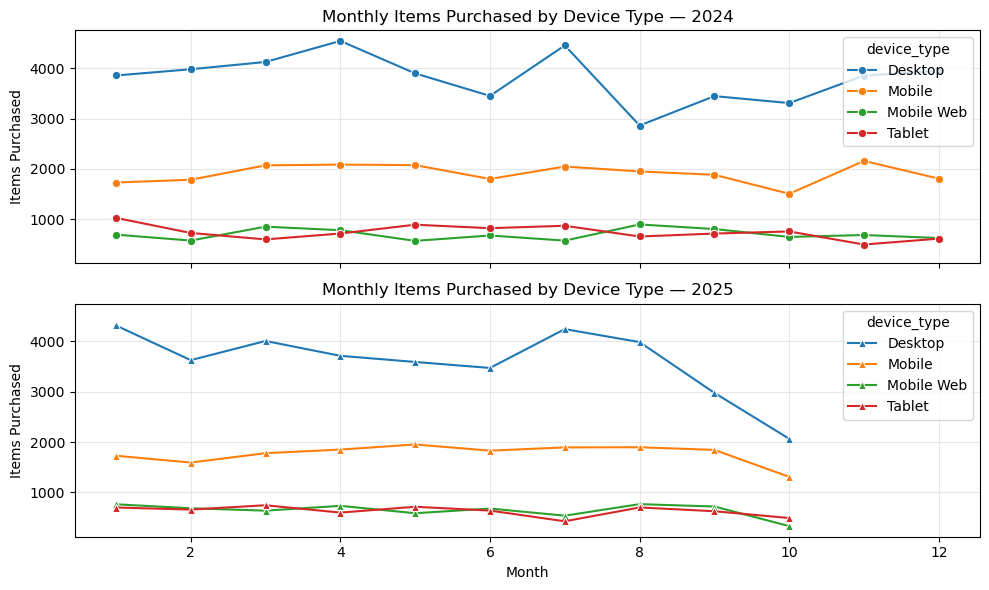

In [2377]:
# --------------------------------------------------
#  Items Purchased - Time Trends by Device Type 
# --------------------------------------------------

# Monthly items purchased(2024-2025) by Device Type
monthly_purchase_device = df.groupby(['year', 'month', 'device_type']).items_purchased.sum().reset_index()

# Filter data by year
device_data_2024 = monthly_purchase_device[monthly_purchase_device['year'] == 2024]
device_data_2025 = monthly_purchase_device[monthly_purchase_device['year'] == 2025]

# Create two subplots — one for each year
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)

# ---- Plot 2024 ----
sns.lineplot(
    data=device_data_2024, 
    x='month', y='items_purchased', hue='device_type', 
    marker='o', ax=axes[0]
)
axes[0].set_title("Monthly Items Purchased by Device Type — 2024")
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Items Purchased')
axes[0].grid(alpha=0.3)

# ---- Plot 2025 ----
sns.lineplot(
    data=device_data_2025, 
    x='month', y='items_purchased', hue='device_type', 
    marker='^', ax=axes[1]
)
axes[1].set_title("Monthly Items Purchased by Device Type — 2025")
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Items Purchased')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li><b>Desktop</b> remains the dominant device for purchases in both 2024 and 2025. Monthly volumes range between 3,000–4,500 items, with clear peaks in April and July each year.</li><br>
<li>Mobile (App) is the clear second-largest contributor, showing steady activity but still far behind Desktop. Shows consistent, stable         contribution around 1,700–2,100 items/month in both years. Performance in 2025 is roughly flat YoY, with slightly better stability (less     fluctuation).</li><br>
<li>Tablet and Mobile Web remain minor channels, contributing a small, relatively flat share. Volumes stay below 1,000 monthly purchases —       relatively low conversion channel. Mobile web remains an underperforming path for conversion.</li><br>
<li>2025 shows a mild overall decline in purchase volumes, consistent with the general traffic slowdown as observed in other charts. Overall     in 2025, purchases remained heavily desktop-driven, while mobile app maintained stable engagement, and mobile web showed small but           promising improvements — indicating a need to strengthen mobile conversion flows.</li>
</ul>
</div>

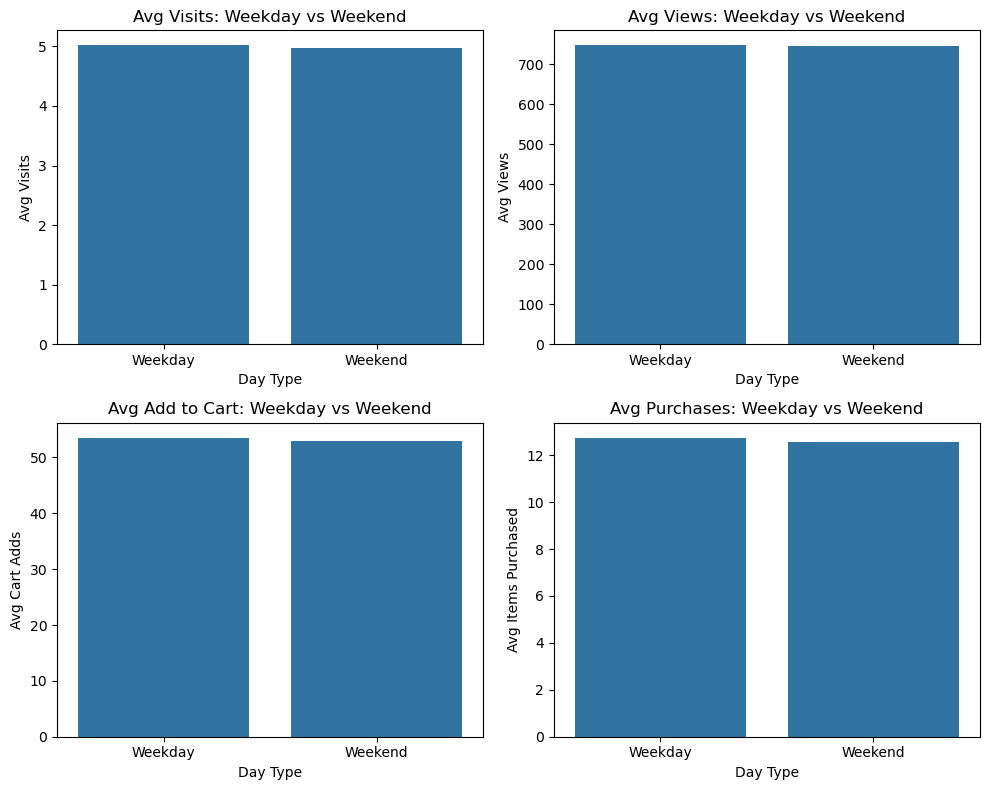

+------------+----------+---------+-------------+-------------------+
| day_type   | visits   | views   | cart_adds   | items_purchased   |
+============+==========+=========+=============+===================+
| Weekday    | 5.01859  | 747.526 | 53.5265     | 12.742            |
+------------+----------+---------+-------------+-------------------+
| Weekend    | 4.97883  | 746.436 | 52.8811     | 12.5549           |
+------------+----------+---------+-------------+-------------------+


In [2379]:
# ------------------------------------------------------------------
#  Weekday vs Weekend Trends (Avg Visits, Avg Views, Avg Purchases)
# -----------------------------------------------------------------

plt.figure(figsize=(10,8))

# --- Creating the 'day_type' column to categorize days into two groups: Weekend and Weekday --- 
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# --- calculating Avg visits/views/cart_adds/items_purchased by 'day_type' ---
weekday_summary = (
    df.groupby(['day_type'])
    .agg({'visits':'mean','views':'mean','cart_adds':'mean', 'items_purchased':'mean'})
    .reset_index()
)

# Avg Visits: Weekday vs Weekend

plt.subplot(2,2,1)
sns.barplot(data=weekday_summary, x='day_type', y='visits')
plt.title("Avg Visits: Weekday vs Weekend")
plt.xlabel('Day Type')
plt.ylabel('Avg Visits')

# Avg Views: Weekday vs Weekend

plt.subplot(2,2,2)
sns.barplot(data=weekday_summary, x='day_type', y='views')
plt.title("Avg Views: Weekday vs Weekend")
plt.xlabel('Day Type')
plt.ylabel('Avg Views')

# Avg Add to Cart: Weekday vs Weekend

plt.subplot(2,2,3)
sns.barplot(data=weekday_summary, x='day_type', y='cart_adds')
plt.title("Avg Add to Cart: Weekday vs Weekend")
plt.xlabel('Day Type')
plt.ylabel('Avg Cart Adds')

# Avg Purchases: Weekday vs Weekend

plt.subplot(2,2,4)
sns.barplot(data=weekday_summary, x='day_type', y='items_purchased')
plt.title("Avg Purchases: Weekday vs Weekend")
plt.xlabel('Day Type')
plt.ylabel('Avg Items Purchased')

plt.tight_layout()
plt.show()

# Display avg visits/views/cart_adds/items_purchased for clarity
print(weekday_summary.to_markdown(index=False, numalign="left",tablefmt="grid"))

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li>Average visits and views differ by less than 1% between weekdays and weekends (5.02 vs 4.98 visits, 747.5 vs 746.4 views), indicating        stable engagement levels throughout the week. There’s no strong weekday–weekend behavioral swing in overall engagement — <b>platform is         attracting a steady audience regardless of day type.</b></li><br>
<li>Cart adds (53.5 vs 52.9) and purchases (12.74 vs 12.55) remain almost flat across both day types. User purchase intent and conversion        efficiency are steady through the week — no significant weekend performance drop-off.</li><br>
<li>With this analysis we may suggest that marketing and UX strategies can therefore remain time-agnostic, focusing instead on improving funnel efficiency rather than day-based targeting.</li>
</ul>
</div>

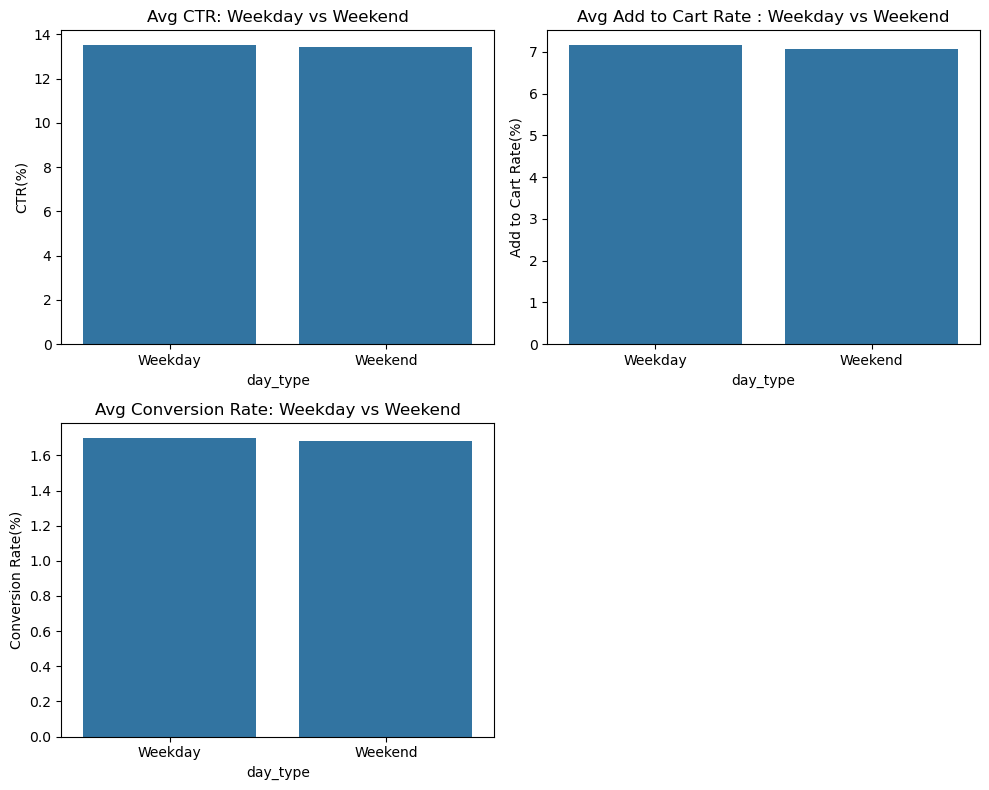

+------------+---------------+---------+-------------+-------------------+-------+--------------------+-------------------+
| day_type   | impressions   | views   | cart_adds   | items_purchased   | ctr   | add_to_cart_rate   | conversion_rate   |
+============+===============+=========+=============+===================+=======+====================+===================+
| Weekday    | 47324605      | 6392096 | 457705      | 108957            | 13.51 | 7.16               | 1.7               |
+------------+---------------+---------+-------------+-------------------+-------+--------------------+-------------------+
| Weekend    | 19196613      | 2574459 | 182387      | 43302             | 13.41 | 7.08               | 1.68              |
+------------+---------------+---------+-------------+-------------------+-------+--------------------+-------------------+


In [2381]:
# -------------------------------------------------------------------------------
#  Weekday vs Weekend Trends (Avg CTR, Avg add_to_cart_rate, Avg conversion_rate)
# -------------------------------------------------------------------------------

plt.figure(figsize=(10,8))

weekday_rates = (
    df.groupby(['day_type'])
    .agg({'impressions':'sum','views':'sum','cart_adds':'sum', 'items_purchased':'sum'})
    .reset_index()
)
# --- calculating Avg CTR/add_to_cart_rate/iconversion_rate by 'day_type' ---

# ctr
weekday_rates['ctr'] = (weekday_rates['views'] / weekday_rates['impressions']*100).round(2)

# add_to_cart_rate
weekday_rates['add_to_cart_rate'] = (weekday_rates['cart_adds'] / weekday_rates['views']*100).round(2)

# conversion_rate
weekday_rates['conversion_rate'] = (weekday_rates['items_purchased'] / weekday_rates['views']*100).round(2)

# Avg CTR: Weekday vs Weekend

plt.subplot(2,2,1)
sns.barplot(data=weekday_rates, x='day_type', y='ctr')
plt.title("Avg CTR: Weekday vs Weekend")
plt.ylabel('CTR(%)')

# Avg Add to Cart Rate : Weekday vs Weekend

plt.subplot(2,2,2)
sns.barplot(data=weekday_rates, x='day_type', y='add_to_cart_rate')
plt.title("Avg Add to Cart Rate : Weekday vs Weekend")
plt.ylabel('Add to Cart Rate(%)')

# Avg Conversion Rate: Weekday vs Weekend

plt.subplot(2,2,3)
sns.barplot(data=weekday_rates, x='day_type', y='conversion_rate')
plt.title("Avg Conversion Rate: Weekday vs Weekend")
plt.ylabel('Conversion Rate(%)')

plt.tight_layout()
plt.show()

# Display table for clarity
print(weekday_rates.to_markdown(index=False, numalign="left",tablefmt="grid"))

<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li>CTR (Click-Through Rate) is identical. A difference of just 0.1 between weekday & weekend.</li><br>
<li>Add-to-Cart Rate is also stable with a variation < 0.08%, indicating uniform product interaction and shopping intent.</li><br>
<li>Essentially identical conversion efficiency with negligible difference in conversion rate.</li><br>
<li>Due to the lack of data which in turn restrict a deep dive into analysis and with the present data behavior we can suggest that focus    should remain on overall funnel optimization rather than day type-specific adjustments. For making any absolute conclusion we need deeper analysis.</li> 
</ul>
</div>

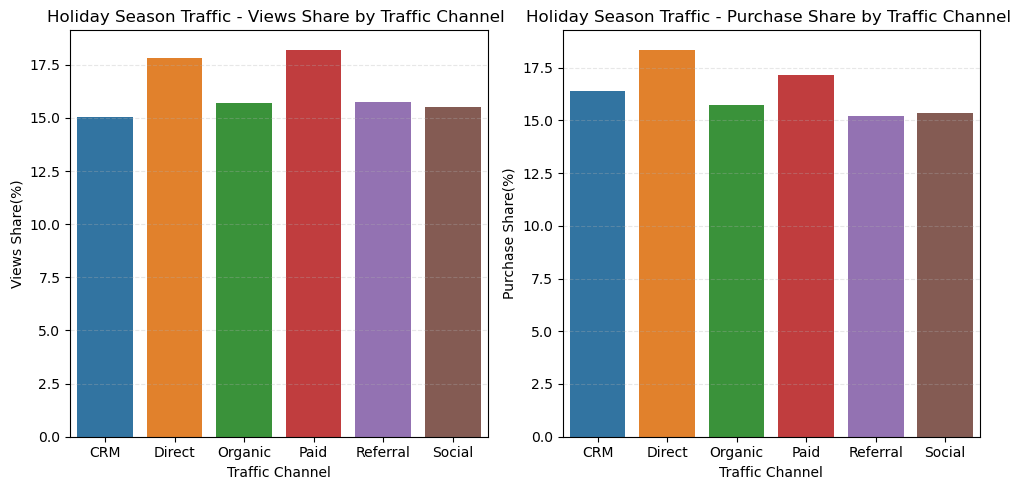

,traffic_channel,views_total_2024,purchase_total_2024,views_holiday_2024,purchase_holiday_2024,views_holiday_share_%,purchase_holiday_share_%
1,Direct,829468,19342,147674,3549,17.80,18.35
3,Paid,858007,8190,156283,1406,18.21,17.17
0,CRM,463033,13950,69636,2283,15.04,16.37
2,Organic,2156423,37735,338897,5930,15.72,15.71
5,Social,319129,1323,49420,203,15.49,15.34
4,Referral,438262,5275,68920,802,15.73,15.20


In [2383]:
# --------------------------------------------------------------------
# Holiday Season (Nov–Dec) Traffic(views/purchase) by Traffic Channel
# --------------------------------------------------------------------

plt.figure(figsize=(10,5))

# --- Filter 2024 data ---
df_2024 = df[df['year'] == 2024]

# --- Total visits in 2024 by channel ---
total_2024 = (
    df_2024.groupby('traffic_channel')[['views','items_purchased']]
    .sum()
    .reset_index()
    .rename(columns={'views': 'views_total_2024','items_purchased': 'purchase_total_2024'})
)

# --- Holiday (Nov–Dec) visits in 2024 by channel ---
holiday_2024 = (
    df_2024[df_2024['month'].isin([11, 12])]
    .groupby('traffic_channel')[['views','items_purchased']]
    .sum()
    .reset_index()
    .rename(columns={'views': 'views_holiday_2024','items_purchased': 'purchase_holiday_2024'})
)

# --- Merge and calculate share ---
holiday_share = total_2024.merge(holiday_2024, on='traffic_channel', how='left')
holiday_share['views_holiday_share_%'] = (
    holiday_share['views_holiday_2024'] / holiday_share['views_total_2024'] * 100
).round(2)
holiday_share['purchase_holiday_share_%'] = (
    holiday_share['purchase_holiday_2024'] / holiday_share['purchase_total_2024'] * 100
).round(2)

# --- Visualization ---
plt.subplot(1,2,1)
sns.barplot(data=holiday_share, x='traffic_channel', y='views_holiday_share_%', hue='traffic_channel')
plt.title("Holiday Season Traffic - Views Share by Traffic Channel ")
plt.xlabel("Traffic Channel")
plt.ylabel("Views Share(%)")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.subplot(1,2,2)
sns.barplot(data=holiday_share, x='traffic_channel', y='purchase_holiday_share_%', hue='traffic_channel')
plt.title("Holiday Season Traffic - Purchase Share by Traffic Channel ")
plt.xlabel("Traffic Channel")
plt.ylabel("Purchase Share(%)")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# --- Display table ---
holiday_share.sort_values('purchase_holiday_share_%', ascending=False)


<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li>Holiday traffic contributes ~15–18% of annual views/purchase across channels. Overall, Nov–Dec account for roughly one-sixth of yearly view/purchase, confirming the <b>holiday season share is not that significant.</b></li><br>
<li>During a typical holiday seasons which are usually a peak season for better conversion, we would typically see: 20–30%+ of annual sales. But in this case holiday period performs roughly similar to other time of the year.Which suggest <b> holiday season isn’t currently a strong driver for business due several reasons.</b> Deep dive through holiday marketing and offers and strengthen holiday-specific campaigns.</li><br>
<b>NOTE:</b><br>
<b>Assumption & Limitation:</b><br>
<li>In this analysis we are assuming November-December Months as holiday seasons.
Present dataset do not have data for November–December 2025, hence the holiday season analysis has been conducted only for Nov–Dec 2024.
Including 2025 in the comparison would create data imbalance leading to an overestimation of annual traffic share.<br>
By restricting the analysis to 2024, we ensure that the total share percentages accurately reflect a complete year’s data, providing a fair and consistent view of seasonal traffic dynamics.</li>
</ul>
</div>

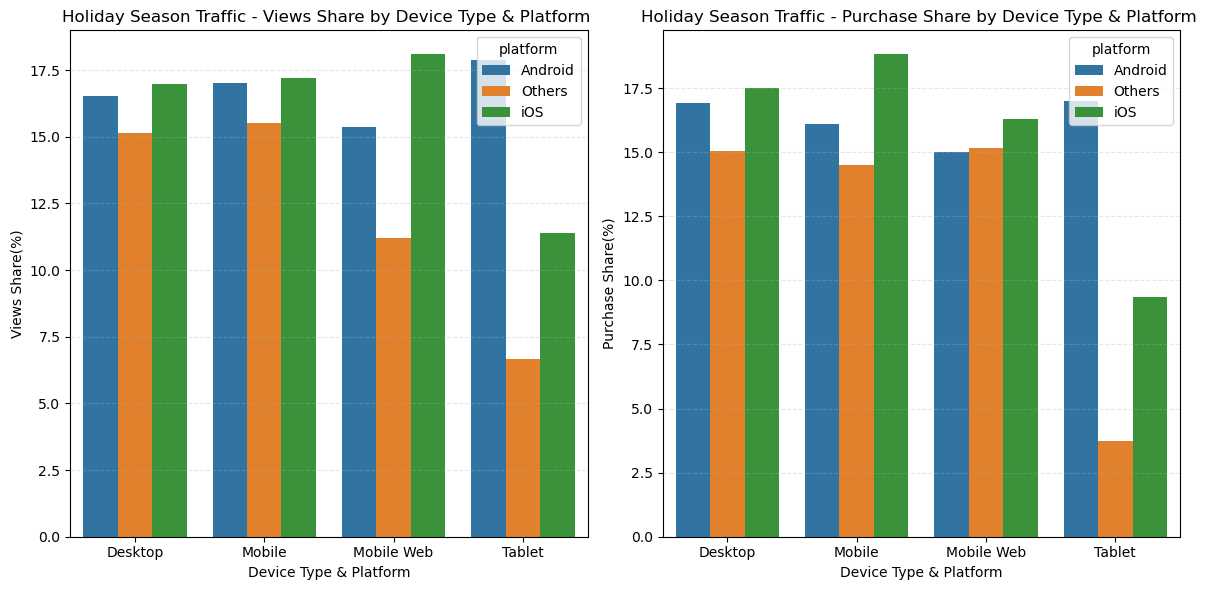

,device_type,platform,views_total_2024,purchase_total_2024,views_holiday_2024,purchase_holiday_2024,views_holiday_share_%,purchase_holiday_share_%
5,Mobile,iOS,688682,11237,118538,2114,17.21,18.81
2,Desktop,iOS,937884,21790,159172,3817,16.97,17.52
9,Tablet,Android,262841,4205,47017,715,17.89,17.00
0,Desktop,Android,1089345,20291,180266,3433,16.55,16.92
8,Mobile Web,iOS,291949,4024,52799,656,18.09,16.30
3,Mobile,Android,803273,10147,136666,1632,17.01,16.08
7,Mobile Web,Others,60583,666,6778,101,11.19,15.17
1,Desktop,Others,213131,3627,32304,546,15.16,15.05
6,Mobile Web,Android,315673,3673,48550,551,15.38,15.00
4,Mobile,Others,133426,1492,20717,216,15.53,14.48


In [2385]:
# ---------------------------------------------------------------------------------
# --- Holiday season(Nov–Dec) traffic(views/purchase) by Device Type/Platform ---
# ---------------------------------------------------------------------------------

plt.figure(figsize=(12,6))

# --- Total visits in 2024 by channel ---
device_total_2024 = (
    df_2024.groupby(['device_type', 'platform'])[['views','items_purchased']]
    .sum()
    .reset_index()
    .rename(columns={'views': 'views_total_2024','items_purchased': 'purchase_total_2024'})
)

# --- Holiday (Nov–Dec) visits in 2024 by Device Type ---
device_holiday_2024 = (
    df_2024[df_2024['month'].isin([11, 12])]
    .groupby(['device_type', 'platform'])[['views','items_purchased']]
    .sum()
    .reset_index()
    .rename(columns={'views': 'views_holiday_2024','items_purchased': 'purchase_holiday_2024'})
)

# --- Merge and calculate share ---
device_holiday_share = device_total_2024.merge(device_holiday_2024, on=['device_type','platform'], how='left')
device_holiday_share['views_holiday_share_%'] = (
    device_holiday_share['views_holiday_2024'] / device_holiday_share['views_total_2024'] * 100
).round(2)
device_holiday_share['purchase_holiday_share_%'] = (
    device_holiday_share['purchase_holiday_2024'] / device_holiday_share['purchase_total_2024'] * 100
).round(2)

# --- Visualization ---

plt.subplot(1,2,1)
sns.barplot(data=device_holiday_share, x='device_type', y='views_holiday_share_%', hue='platform')
plt.title("Holiday Season Traffic - Views Share by Device Type & Platform ")
plt.xlabel("Device Type & Platform")
plt.ylabel("Views Share(%)")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.subplot(1,2,2)
sns.barplot(data=device_holiday_share, x='device_type', y='purchase_holiday_share_%', hue='platform')
plt.title("Holiday Season Traffic - Purchase Share by Device Type & Platform ")
plt.xlabel("Device Type & Platform")
plt.ylabel("Purchase Share(%)")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# --- Display table ---
device_holiday_share.sort_values('purchase_holiday_share_%', ascending=False)


<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li>Overall holiday engagement across devices is average, with most platforms showing 15–18% of annual traffic, seasonal performance is          similar to other time of the year</li><br>
<li><b>iOS devices (Mobile & Desktop)</b> perform slightly better than other devices, with Mobile iOS (18.8%) and Desktop iOS (17.5%) showing above-average purchase share — indicating a slightly higher purchase intent among iOS users during the holidays.</li><br>
<li><b>Tablet(Others/iOS) segment show low engagement and purchase share</b>, under 10% purchase share.
Further analysis is rerquied to deep dive through why most of the devices perform weak around the holiday season and understand if the       holiday campaingns are performing well or not.</li>
</ul>
</div>

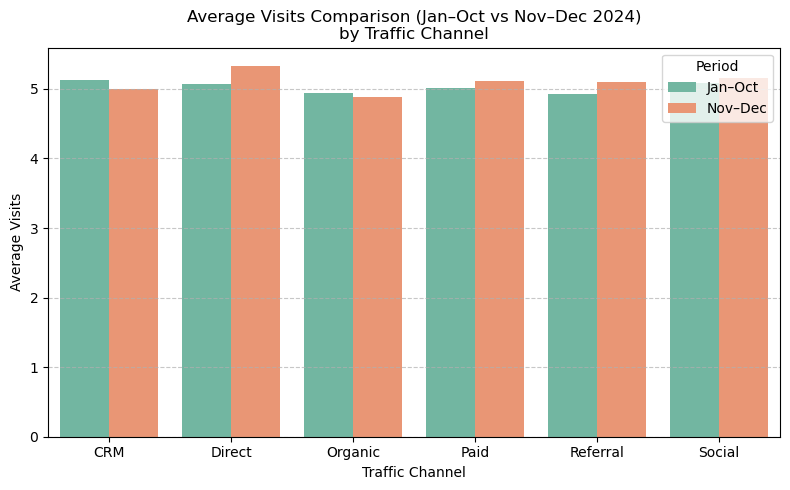

,traffic_channel,visits,period
5,Social,5.077998,Jan–Oct
5,Social,5.163522,Nov–Dec
4,Referral,4.932318,Jan–Oct
4,Referral,5.106195,Nov–Dec
3,Paid,5.007353,Jan–Oct
3,Paid,5.108475,Nov–Dec
2,Organic,4.947938,Jan–Oct
2,Organic,4.886842,Nov–Dec
1,Direct,5.073702,Jan–Oct
1,Direct,5.325581,Nov–Dec


In [2387]:
# --------------------------------------------------------------------------------
#  --- Average Visits Comparison (Jan–Oct vs Nov–Dec 2024) by Traffic Channel ---
# --------------------------------------------------------------------------------

# Filter data for 2024
df_2024 = df[df['year'] == 2024]

# --- Separate time periods ---
df_10_months = df_2024[df_2024['month'].between(1, 10)]   # Jan–Oct
df_holiday = df_2024[df_2024['month'].isin([11, 12])]      # Nov–Dec

# --- Aggregate average visits by Traffic Channel ---
avg_10_months_channel = (
    df_10_months.groupby('traffic_channel')['visits']
    .mean()
    .reset_index()
    .assign(period='Jan–Oct')
)

avg_holiday_channel = (
    df_holiday.groupby('traffic_channel')['visits']
    .mean()
    .reset_index()
    .assign(period='Nov–Dec')
)

# Combine both periods
avg_visits_compare_channel = pd.concat([avg_10_months_channel, avg_holiday_channel])

# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_visits_compare_channel,
    x='traffic_channel',
    y='visits',
    hue='period',
    palette='Set2'
)
plt.title("Average Visits Comparison (Jan–Oct vs Nov–Dec 2024)\nby Traffic Channel")
plt.xlabel("Traffic Channel")
plt.ylabel("Average Visits")
plt.legend(title="Period")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Table for clarity
display(avg_visits_compare_channel.sort_values(by='traffic_channel',ascending=False))


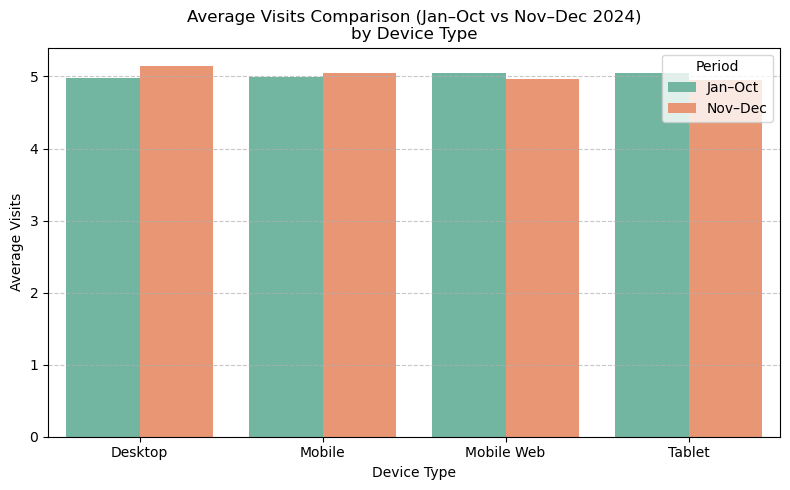

,device_type,visits,period
0,Desktop,4.978319,Jan–Oct
0,Desktop,5.141553,Nov–Dec
1,Mobile,4.998968,Jan–Oct
1,Mobile,5.047030,Nov–Dec
2,Mobile Web,5.047506,Jan–Oct
2,Mobile Web,4.959302,Nov–Dec
3,Tablet,5.049505,Jan–Oct
3,Tablet,4.956140,Nov–Dec


In [2388]:
# ---------------------------------------------------------------------------------
#       Average Visits Comparison (Jan–Oct vs Nov–Dec 2024) by Device Type 
# ----------------------------------------------------------------------------------

# --- Aggregate average visits by device type ---
avg_10_months_device = (
    df_10_months.groupby('device_type')['visits']
    .mean()
    .reset_index()
    .assign(period='Jan–Oct')
)

avg_holiday_device = (
    df_holiday.groupby('device_type')['visits']
    .mean()
    .reset_index()
    .assign(period='Nov–Dec')
)

# Combine both periods
avg_visits_compare_device = pd.concat([avg_10_months_device, avg_holiday_device])

# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_visits_compare_device,
    x='device_type',
    y='visits',
    hue='period',
    palette='Set2'
)
plt.title("Average Visits Comparison (Jan–Oct vs Nov–Dec 2024)\nby Device Type")
plt.xlabel("Device Type")
plt.ylabel("Average Visits")
plt.legend(title="Period")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Table for clarity
display(avg_visits_compare_device.sort_values(by='device_type'))


<div style="background-color:#eaf4f4; padding:15px; border-radius:10px;">
<h3>Key Insights</h3>
<ul>
<li><b>Avg visits(Jan–Oct vs Nov–Dec) by Traffic Channel: </b>Overall slight uplift in holiday (Nov–Dec) avg visits across most channels — nearly every traffic source (Direct, Paid, Social, Referral) shows slightly higher average visits compared to Jan–Oct, could be indicating a slight seasonal traffic boost in these channels.</li><br>
<li><b>Avg visits(Jan–Oct vs Nov–Dec) by Device Type: </b>Overall stability across devices. Average visits remain consistent almost across device types (≈5 visits), indicating balanced user traffic regardless of device during the year. Slightly uplift in Desktop.</li><br>
<li>Overall Holiday Avg customer lands on site by Channel/Device Type remains almost evenly distributed, is not seasonally dependent.</li>
</ul>
</div>

<div style="background-color:#fdecef; padding:15px; border-radius:10px; border:1px solid #f8cdd1;">

<h3>Data Limitations & Actionable Insights</h3> 

The analysis provides directional insights into performance across **traffic channels**, **devices**, **platforms**, **countries**, and **time periods**, offering a broad view of engagement and conversion patterns.  
However, the dataset lacks several critical dimensions for deeper analysis — such as **customer-level identifiers**, **revenue or order value information**, **campaign performance metrics**, and **page-level engagement indicators** (e.g., bounce rate, pages per session).  
These limitations restrict the ability to assess **user retention**, **marketing ROI**, and **behavioral depth**, and prevent identifying **causal drivers** of conversion performance.  

Despite these constraints, the data supports actionable insights focused on:
- **Optimizing traffic quality** and **conversion efficiency** within existing funnels  
- **Balancing performance across devices, platforms, and channels**  
- **Sustaining consistent engagement** over time
- **In Depth Study** of fall/spike in engagement,intention during fall/spike months/years

</div>
